## Декомпозиция.

***Заказчик исследования:*** отдел маркетинга "Метанпромбанка".

***Проблема, с которой обратился заказчик:*** в банке повысился отток клиентов.

***Дополнительные вводные данные:*** в отделе маркетинга нет автоматизированных систем рассылок, письма каждому клиенту пишутся вручную.

***Цель исследования:*** анализ оттока клиентов банка, по результатам которого - предоставление отделу маркетинга компактных однородных сегментов клиентов, которые склонны уходить из банка. Приведение примеров мероприятий, которые можно провести, чтобы вернуть клиентов в банк или удержать сомневающихся от оттока.

***Задачи исследования:***

1. Загрузка и описание данных:

- подключение необходимых библиотек для проведения исследования,
- загрузка данных,
- изучение данных и краткое описание.

2. Предобработка данных:

- приведение наименований столбцов таблицы к единому стилевому оформлению,
- преобразование типов данных в случае необходимости,
- изучение пропусков и их обработка,
- проверка на явные дубликаты,
- проверка на неявные дубликаты.

3. Детальное изучение данных, отражённых в каждом столбце таблицы, в совокупности, и в разрезе оттока:

- формирование среза для "клиентов-отточников",
- изучение количества пользователей (в общем, и для оттока), подсчёт процента оттока,
- изучение баллов кредитного скоринга (минимальные и максимальные значения, среднее) - для всех пользователей и для оттока,
- город - распредение клиентов по филиалам банка - для всех пользователей и для оттока,
- пол и возраст - половозрастное распределение клиентов в общей совокупности и по оттоку,
- количество баллов собственности (минимальные, максимальные, средние значения) - по совокупности и по оттоку,
- баланс на счёте - (минимальные, максимальные, средние значения) - по совокупности и по оттоку,
- количество продуктов, которыми пользуется клиент - изучение параметра по совокупности и по оттоку,
- наличие кредитной карты - подсчёт числа пользователей, имеющих кредитную карту среди всех пользователей и "клиентов-отточников",
- активный клиент - подсчёт количества активных пользователей среди всех пользователей и среди "клиентов-отточников",
- заработная плата клиента (минимальные, максимальные, средние значения) - по совокупности и по оттоку.

4. Анализ оттока клиентов банка:

- формирование портрета клиента, склонного к уходу из банка (в разрезе всех вышеперечисленных показателей),
- корреляционный анализ,

- на основании полученных результатов - формулирование статистических гипотез (как минимум двух),
- проверка выдвинутых статистических гипотез.

5. Подведение промежуточных итогов, выявление признаков, влияющих на отток клиентов из банка.

6. Сегментация текущих клиентов банка:

- формирование неузких сегментов (от 500 клиентов на сегмент) по выявленным критериям риска ухода клиента из банка,
- приоритезация сегментов (вследствие отсутствия автоматизированных систем рассылок).

7. Формирование рекомендаций по работе с клиентами приоритетного сегмента.

**Приложения к исследованию:**
    
1. [Презентация](https://disk.yandex.ru/i/a0pXrnEkCLyZUA)
2. [Дашборд](https://public.tableau.com/app/profile/ekaterina.lavrova/viz/bankprod/Dashboard1?publish=yes)

## Загрузка и описание данных.

### Подключение необходимых библиотек и расширений, загрузка данных.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import datetime as dt
import math as mth
import phik


pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
try:
    data = pd.read_csv('D:\\Катя\\Яндекс практикум\\ФИНАЛЬНЫЙ проект\\bank_scrooge.csv')
except:
    print('Error')

**Загружены необходимые библиотеки для проведения исследования. А также данные с информацией о клиентах банка.**

### Изучение данных и краткое описание.

In [3]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
data['credit_card'].unique()

array([0, 1], dtype=int64)

In [6]:
data['last_activity'].unique()

array([1, 0], dtype=int64)

In [7]:
data['churn'].unique()

array([1, 0], dtype=int64)

**Таблица содержит 12 столбцов и 10000 строк.**

**Наименования столбцов указаны следующим образом:**

- ***userid — идентификатор пользователя,***
- ***score — баллы кредитного скоринга,***
- ***сity — город,***
- ***gender — пол,***
- ***age — возраст,***
- ***equity — количество баллов собственности,***
- ***balance — баланс на счёте,***
- ***products — количество продуктов, которыми пользуется клиент,***
- ***creditcard — есть ли кредитная карта,***
- ***last_activity — является ли клиент активным,***
- ***estimated_salary — заработная плата клиента,***
- ***churn — ушёл ли клиент из банка или нет.***

**Данные в столбцах 'credit_card', 'last_activity', 'churn' указаны по принципу буллевых значений как 1 (True) и 0 (False).**

**Соответственно, credit_card = 0 - кредитная карта у клиента отсутствует, credit_card = 1 - кредитная карта у клиента имеется. Last_activity = 0 - клиент не является активным клиентом, last_activity = 1 - клиент активный. Churn = 0 - клиент не ушёл из банка, churn = 1 - клиент ушёл из банка.**

**В представленных данных имеются пропуски. Поэтому следует изучить пропущенные значения и обработать их в случае необходимости. Также следует осуществить проверку на явные и неявные дубликаты, изменить тип данных в некоторых столбцах и привести наименования столбцов в единому стилевому оформлению.**

## Предобработка данных.

### Приведение наименований столбцов таблицы к единому стилевому оформлению.

In [8]:
data.columns = data.columns.str.lower()

In [9]:
data.rename(columns={'userid':'user_id'}, inplace=True)

In [10]:
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

**Для удобства в работе названия столбцов были приведены к единому стилевому оформлению.**

### Обработка пропусков.

In [11]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [12]:
data['age'].isna().sum() + data['balance'].isna().sum()

2321

In [13]:
(data['age'].isna().sum() + data['balance'].isna().sum())/ len(data) * 100

23.21

**Таблица содержит 26 пропусков в столбце 'age' и 2295 пропусков в столбце 'balance'. Всего 2321 пропуск, или 23,21% от всего объёма данных.**

In [14]:
data.query('age.isna()')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3091,138660,836.00,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834.00,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
5470,218868,827.00,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
7236,210135,908.00,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0
7345,184913,829.00,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


In [15]:
data.query('balance.isna()').head(15)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
9,133130,906.00,Ярославль,Ж,67.00,0,NaN,1,0,1,238055.53,0
10,148929,927.00,Ростов,М,52.00,0,NaN,1,1,1,196820.07,0
11,172184,921.00,Ростов,М,41.00,0,NaN,1,1,1,217469.48,0
19,127034,922.00,Рыбинск,Ж,53.00,0,NaN,1,0,0,147094.82,0
21,177415,896.00,Рыбинск,Ж,47.00,0,NaN,1,0,0,225060.35,0
30,155730,946.00,Ярославль,Ж,47.00,0,NaN,2,1,1,660015.85,0
34,205226,944.00,Ярославль,М,35.00,0,NaN,2,1,1,239843.39,0
39,173175,924.00,Рыбинск,Ж,51.00,0,NaN,1,1,1,248844.47,0
43,228585,956.00,Ростов,М,41.00,0,NaN,1,1,0,115117.10,0


In [16]:
data.query('balance.isna()').groupby('city').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,user_id
city,
Ярославль,1467
Рыбинск,593
Ростов,235


**Пропуски в столбце 'age' вероятно получены случайно. Если данные вводились вручную, можно предположить, что имел место человеческий фактор и сотрудник не указал возраст некоторых клиентов. Либо, даже если данные сформировались автоматически, по какой-то причине по 26 клиентам данные о возрасте не сохранились. По общепринятой классификации пропусков пропуски в столбце 'age' можно отнести к MCAR (Missing Completely At Random / Отсутствует совершенно случайно), либо MAR (Missing At Random / Отсутствует случайно). Указанные пропуски предлагаем заполнить медианным значением по столбцу 'age'. Пропуски в количестве 26 ед. составляют существенно менее 1% от объёма данных в 10 тыс.строк. Внесённые изменения не окажут влияния на результаты исследования.**

In [17]:
data['age'] = data['age'].fillna(data['age'].median())

In [18]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

**Проверим зависимость пропущенных значений в столбце 'balance' от других параметров. Зададим новый столбец, в котором укажем значение 1, если есть пропуски, и 0 - если пропусков нет. Затем, посчитаем средние значения и сделаем выводы о пропусках.**

In [19]:
data['na_balance'] = data['balance']
data.loc[data['na_balance'] >= 0, 'na_balance'] = 0
data['na_balance'] = data['na_balance'].fillna(1)
data['na_balance'] = data['na_balance'].astype(int)

In [20]:
# Формирование таблицы расчёта основных значений с учётом пропусков и без учёта пропусков для текущих клиентов
na_current = data.query('churn == 0').groupby('na_balance').agg({'est_salary':['mean', 'median'],
                           'age':'mean',
                           'products':'median', 
                           'equity':'median',
                           'score': 'mean',
                           'gender':pd.Series.mode, 
                           'city':pd.Series.mode,
                           'credit_card': pd.Series.mode,
                           'last_activity' : pd.Series.mode}).transpose()

na_current.columns = ['NO miss', 'Miss']
na_current['Difference, %%'] = np.NaN
na_current.iloc[:6, 2] = na_current.iloc[:6, 1] / na_current.iloc[:6, 0] * 100 - 100

na_current

NO miss       Miss Difference, %%
est_salary    mean    117596.47  225803.06          92.02
              median  100557.51  174061.49          73.10
age           mean        43.39      42.05          -3.09
products      median          2          1         -50.00
equity        median          3          0        -100.00
score         mean       837.67     865.48           3.32
gender        mode            Ж          М            NaN
city          mode    Ярославль  Ярославль            NaN
credit_card   mode            1          1            NaN
last_activity mode            0          1            NaN

In [21]:
# Формирование таблицы расчёта основных значений с учётом пропусков и без учёта пропусков для ушедших клиентов
na_churn = data.query('churn == 1').groupby('na_balance').agg({'est_salary':['mean', 'median'],
                           'age':'mean',
                           'products':'median', 
                           'equity':'median',
                           'score': 'mean',
                           'gender':pd.Series.mode, 
                           'city':pd.Series.mode,
                           'credit_card': pd.Series.mode,
                           'last_activity' : pd.Series.mode}).transpose()

na_churn.columns = ['NO miss', 'Miss']
na_churn['Difference, %%'] = np.NaN
na_churn.iloc[:6, 2] = na_churn.iloc[:6, 1] / na_churn.iloc[:6, 0] * 100 - 100

na_churn

NO miss       Miss Difference, %%
est_salary    mean    147040.92  315334.21         114.45
              median  124934.85  248232.39          98.69
age           mean        41.40      47.77          15.37
products      median          2          1         -50.00
equity        median          4          0        -100.00
score         mean       863.55     843.08          -2.37
gender        mode            М          М            NaN
city          mode    Ярославль  Ярославль            NaN
credit_card   mode            1          1            NaN
last_activity mode            1          0            NaN

**В пропущенных значениях баланса (как для действующих клиентов, так и для оттока) существует некоторая закономерность. Например, у клиентов с пропущенными значениями существенно больше зарплата (как минимум на 73%, как максимум на 114%), продукты меньше на 50%, а баллы собственности меньше на 100%, чаще встречаются у клиентов-мужчин из Ярославля (хотя, в пропусках присутствуют также клиенты-женщины и другие города - Ростов и Рыбинск), а также чаще у клиентов с кредитной картой.**
    
**В пропущенных значениях баланса (как для действующих клиентов, так и для оттока) не обнаружена какая-либо закономерность для значений возраста, баллов кредитного скоринга, активности.**
    
**Пропуски в столбце 'balance' можно рассматривать частично как MNAR (Missing Not At Random / Отсутствует не случайно) и частично как MCAR (Missing Completely At Random / Отсутствует совершенно случайно). Для каких-то столбцов пропуски в балансе, возможно, связаны и имеет место технический сбой; для каких-то столбцов пропуски в балансе совершенно случайны.**
    
**В любом случае, пропущенные данные составляют 1/5 часть данных. Поэтому данные пропуски предлагается оставить без изменения, т.к. заполнение такого существенного количества пропусков каким-либо значением, либо удаление этих пропусков, несомненно окажет влияние на исследование и, вероятно, исказит полученные результаты.**

### Обработка явных дубликатов.

In [22]:
data.duplicated().sum()

0

**Явных дубликатов не обнаружено.**

### Поиск неявных дубликатов.

**Сначала проверим на неявные дубликаты столбцы с категориальными данными.**

In [23]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

**В столбце 'city' неявные дубликаты отсутствуют.**

In [24]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

**В столбце 'gender' неявные дубликаты отсутствуют.**

**Проверим на неявные дубликаты значения в столбце 'user_id'.**

In [25]:
data['user_id'].nunique()

9927

In [26]:
len(data['user_id']) - data['user_id'].nunique()

73

In [27]:
(len(data['user_id']) - data['user_id'].nunique())/ len(data) * 100

0.73

**В столбце 'user_id' обнаружены 73 неуникальных идентификатора пользователей, что составляет менее 1% от всего объёма данных (10 тыс.строк).**

In [28]:
# сохраним в переменную d список дублирующихся значений user_id
d = data.query('user_id.duplicated() == True')['user_id'].tolist()

In [29]:
data.query('user_id == @d').sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,na_balance
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1,0
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0,1
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0,1
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1,0
5896,120258,905.00,Ярославль,М,30.00,0,NaN,1,1,1,146427.96,0,1
5863,120258,908.00,Рыбинск,Ж,38.00,4,2213581.63,2,0,1,160327.77,1,0
1411,123461,829.00,Ярославль,Ж,59.00,0,96222.44,2,0,1,102771.55,1,0
8638,123461,934.00,Рыбинск,М,34.00,0,NaN,2,1,0,291619.27,0,1
8164,124450,859.00,Ярославль,Ж,38.00,6,516811.20,1,1,1,95144.63,1,0
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0,0


**Рассмотрев подробнее дублирующиеся значения в 'user_id' можно сделать вывод о том, что это неполные дубликаты, в данных указаны разные клиенты, т.к. при совпадении значений в столбце 'user_id' значения в остальных столбцах при этом отличаются. Таким образом, оставим данные без изменений. Также можно отметить, что дублирующиеся значения обнаружены только в 2-ух филиалах - Рыбинск и Ярославль. Вероятно имела место какая-либо техническая ошибка из-за которой разные клиенты в двух разных филиалах получили одинаковые идентификационные номера.**

### Преобразование типов данных.

**Приведём данные в столбце 'age' к int64 вместо float64 (возраст измеряется в целых числах).**

In [30]:
data['age'] = data['age'].astype('int64')

**В данных присутствуют 2 неупорядоченные категориальные переменные - 'city' и 'gender'. Для проведения дальнейшего корреляционного анализа закодируем данные значения при помощи pandas.get_dummies().**  

In [31]:
# создадим копии столбцов 'city' и 'gender'
data['city_copy'] = data['city']
data['gender_copy'] = data['gender']

In [32]:
# кодирование переменных
data = pd.get_dummies(data, columns=['city_copy', 'gender_copy'], drop_first= False)

In [33]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,na_balance,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль,gender_copy_Ж,gender_copy_М
0,183012,850.00,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0,1,0
1,146556,861.00,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0,1,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,0,1,0,1,0
3,225363,866.00,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,0,1,0,1


**Необходимые преобразования типов данных выполнены.**

**Таким образом, в предобработке данных были осуществлены следующие изменения в данных:**

1. ***Названия столбцов были приведены к единому стилевому оформлению (для удобства в работе),***

2. ***Были выявлены пропуски в количестве 2321 шт., что составляет 23% от всех данных. Пропуски присутствуют в двух столбцах - 'age' (в количестве 26 шт.) и 'balance' (в количестве 2295 шт.).***

***Пропуски в столбце 'age' были классифицированы по общепринятой шкале как MCAR (Missing Completely At Random / Отсутствует совершенно случайно), либо MAR (Missing At Random / Отсутствует случайно). Указанные пропуски в количестве 26 ед. составляют существенно менее 1% от общего объёма данных в 10 тыс.строк. Указанные пропуски были заполенены  медианным значением по столбцу 'age', что не исказит результатов исследования.***

***Пропуски в столбце 'balance' насчитывают 2295 значений, что составляет 22,95% от всего объёма данных. Пропуски присутствуют в данных всех филиалов банка. Вероятнее всего, причина таких пропусков - во время загрузки/выгрузки данных произошла техническая ошибка. По общепринятой классификации пропусков пропуски в столбце 'balance' можно отнести к MNAR (Missing Not At Random / Отсутствует не случайно). Данные пропуски предлагается оставить без изменения, т.к. заполнение такого существенного количества пропусков каким-либо значением несомненно окажет влияние на исследование и, вероятно, исказит полученные результаты.***

3. ***Осуществлена проверка на поиск явных дубликатов (необнаружены).***

4. ***Осуществлена проверка на поиск неявных дубликатов.***

***Дублирующиеся значения обранужены в столбце 'user_id' в количестве 73 шт. Рассмотрев подробнее дублирующиеся значения можно сделать вывод о том, что это неполные дубликаты и в данных указаны разные клиенты, т.к. при совпадении значений в столбце 'user_id' значения в остальных столбцах при этом отличаются. Таким образом, данные были оставлены без изменений, т.к. они не оказались неявными дубликатами.***

5. ***Данные в столбце 'age' были приведены к типу данных int64 вместо float64 (возраст измеряется в целых числах).***

6. ***В данных присутствуют 2 неупорядоченные категориальные переменные - 'city' и 'gender'. Для проведения дальнейшего корреляционного анализа данные значения были закодированы при помощи pandas.get_dummies().***

## Детальное изучение данных, отражённых в каждом столбце таблицы, в совокупности, и в разрезе оттока.

### Изучение количества пользователей (в общем, и для оттока), подсчёт процента оттока.

In [34]:
len(data['user_id'])

10000

**Всего в данных представлено 10000 пользователей.**

In [35]:
# churn = 0 - клиент не ушёл из банка, churn = 1 - клиент ушёл из банка.
data.groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,8180
1,1820


In [36]:
(data.groupby('churn').agg({'user_id':'count'})['user_id'][1])/ len(data['user_id']) * 100

18.2

**Количество действующих клиентов банка 8180 человек, или 81.8% от всей клиентской базы. Количество клиентов, ушедших из банка - 1820 человек. Т.о., отток клиентов составляет 18.2%.**

### Изучение баллов кредитного скоринга (минимальные и максимальные значения, среднее) - для всех пользователей и для оттока.

In [37]:
data['score'].describe()

count   10000.00
mean      848.70
std        65.45
min       642.00
25%       802.00
50%       853.00
75%       900.00
max      1000.00
Name: score, dtype: float64

**Минимальное число баллов кредитного скоринга 642, максимальное число баллов кредитного скоринга 1000, медианное значение 853 балла (расчёт по всей совокупности клиентов).**

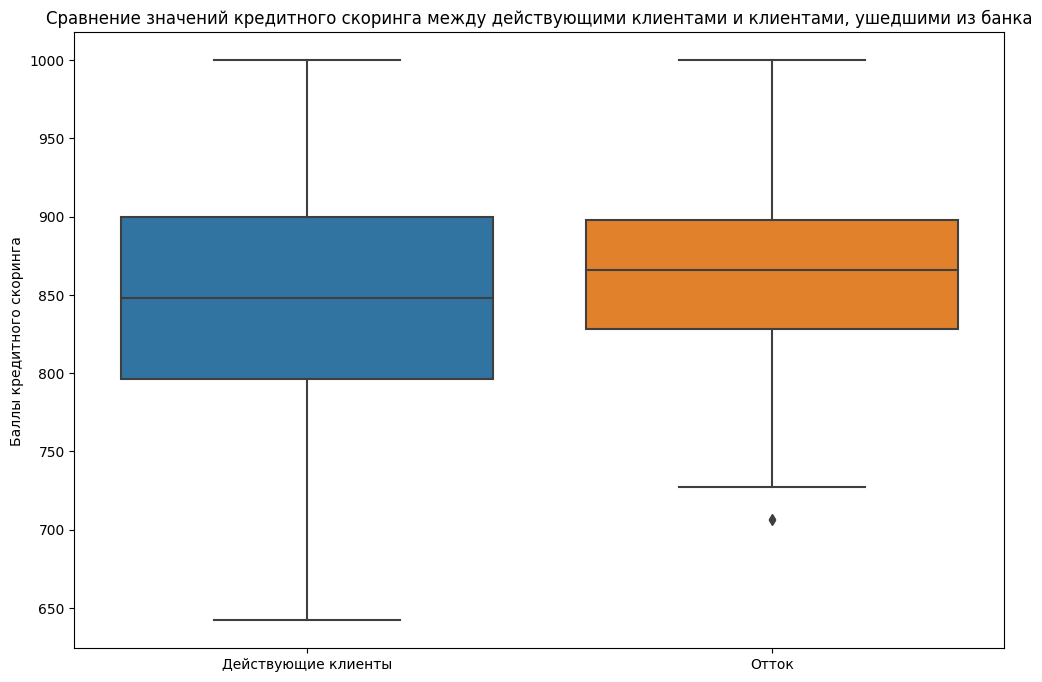

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='churn', y='score', data= data).set_xticklabels(('Действующие клиенты','Отток'))
plt.title('Сравнение значений кредитного скоринга между действующими клиентами и клиентами, ушедшими из банка')
plt.ylabel('Баллы кредитного скоринга')
plt.xlabel(None)
plt.show()

**Клиенты, ушедшие из банка, имели лучшие баллы кредитного скоринга. Минимальные значения кредитного рейтинга у оттока ~730 баллов против ~650 баллов у действующих клиентов. Первый квартиль у оттока равен ~830 баллам, медиана ~870 баллов против, соответственно, первого квартиля = 800 и медианы = 850 баллов у действующих клиентов. Значения третьего квартиля и максимума у действующих клиентов и у "отточников" одинаковые.**

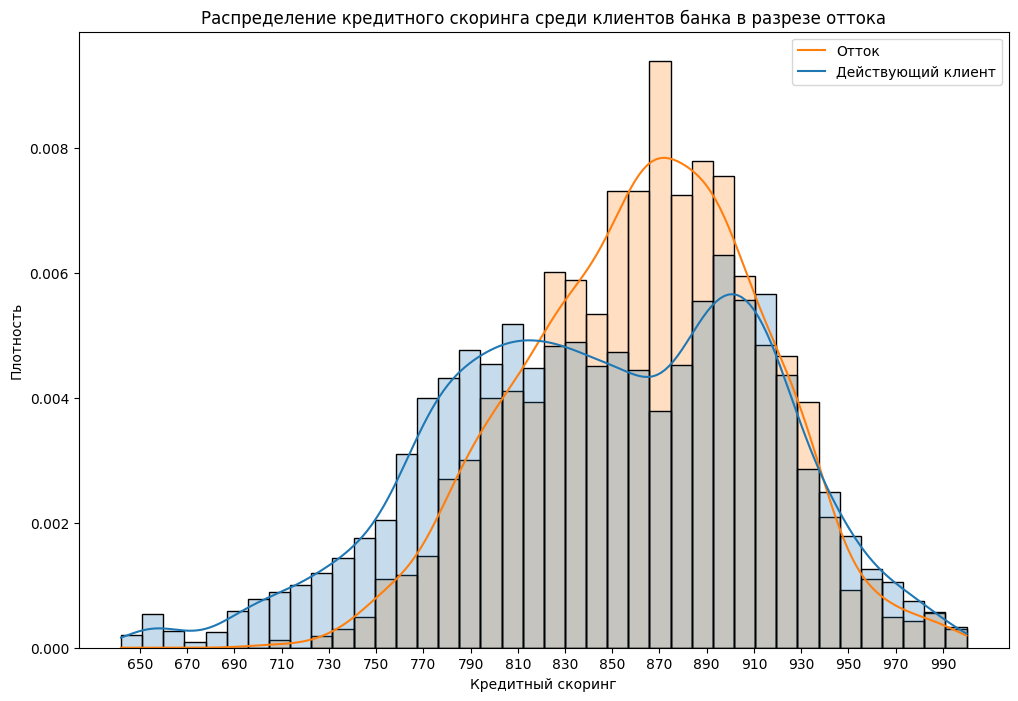

In [39]:
plt.figure(figsize=(12,8))
sns.histplot(x='score', hue='churn', data=data, stat="density", common_norm=False, alpha = 0.25, kde=True).\
set_xticks(range(650,1000,20))
plt.title('Распределение кредитного скоринга среди клиентов банка в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Кредитный скоринг')
plt.legend(title= None, labels=['Отток', 'Действующий клиент'])
plt.show()

**На гистограмме более отчётливо виден отток клиентов с хорошим кредитным скорингом от ~820 до 940 баллов.**

### Распредение клиентов по филиалам банка - для всех пользователей и для оттока.

In [40]:
# формирование таблицы распределения всей совокупности клиентов по городам присутсвия банка
c = data.groupby('city').agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)
c['%'] = c['user_id'] / len(data) * 100
c

,user_id,%
city,,
Ярославль,5888,58.88
Рыбинск,2695,26.95
Ростов,1417,14.17


**Практически 60% клиентов банка обслуживаются в Ярославле. На область приходится 40%, в Рыбинске обслуживается практически 27% клиентов, в Ростове 14% (расчёт по всем клиентам).**

In [41]:
# формирование сводной таблицы распределения клиентов по городам присутствия банка в разрезе "действующий клиент - отточный"
city_ch = data.pivot_table(index='city', columns='churn', values='user_id', aggfunc='count').reset_index()
city_ch.columns = ['city', 'current', 'churn']
city_ch['% current'] = city_ch['current'] / city_ch['current'].sum() * 100
city_ch['% churn'] = city_ch['churn'] / city_ch['churn'].sum() * 100
city_ch.sort_values(by='current', ascending=False)

,city,current,churn,% current,% churn
2,Ярославль,4771,1117,58.33,61.37
1,Рыбинск,2258,437,27.60,24.01
0,Ростов,1151,266,14.07,14.62


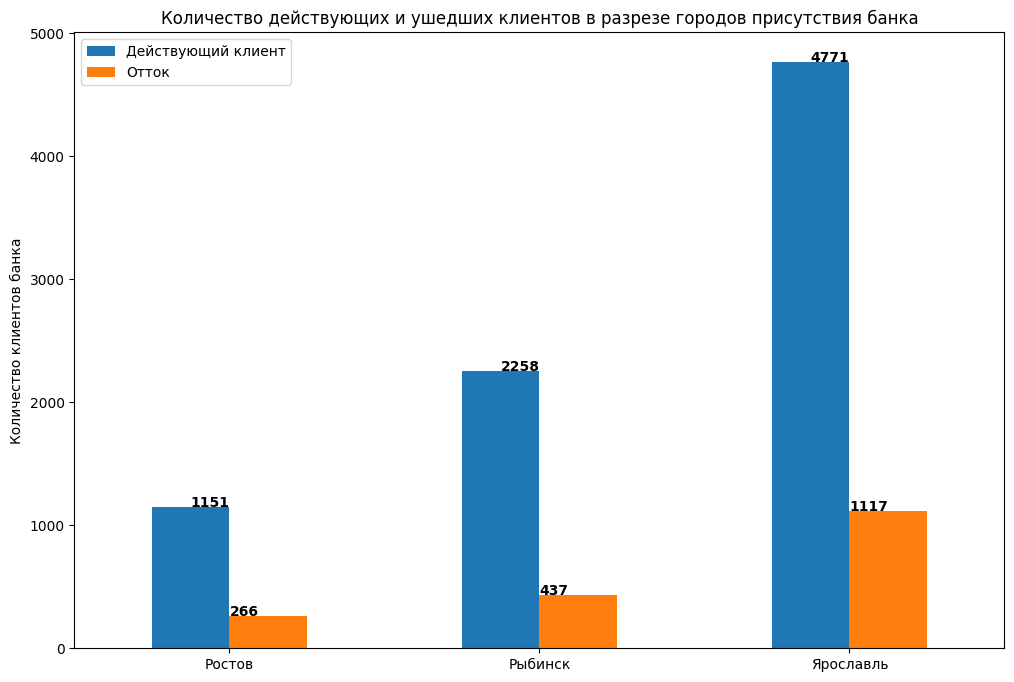

In [42]:
ax = city_ch[['current', 'churn']].plot(kind='bar', figsize=(12,8))
plt.xticks(ticks=[0,1,2], labels=['Ростов', 'Рыбинск', 'Ярославль'], rotation=360)
for x, y in city_ch[['current', 'churn']].iterrows():
    ax.text(x, y[1]+1, str(y[1]), ha='left', fontweight='bold')
for x, y in city_ch.iterrows():
    ax.text(x, y[1]+1, str(y[1]), ha='right', fontweight='bold')
plt.title('Количество действующих и ушедших клиентов в разрезе городов присутствия банка')
plt.ylabel('Количество клиентов банка')
plt.legend(title= None, labels=['Действующий клиент', 'Отток'])
plt.show()

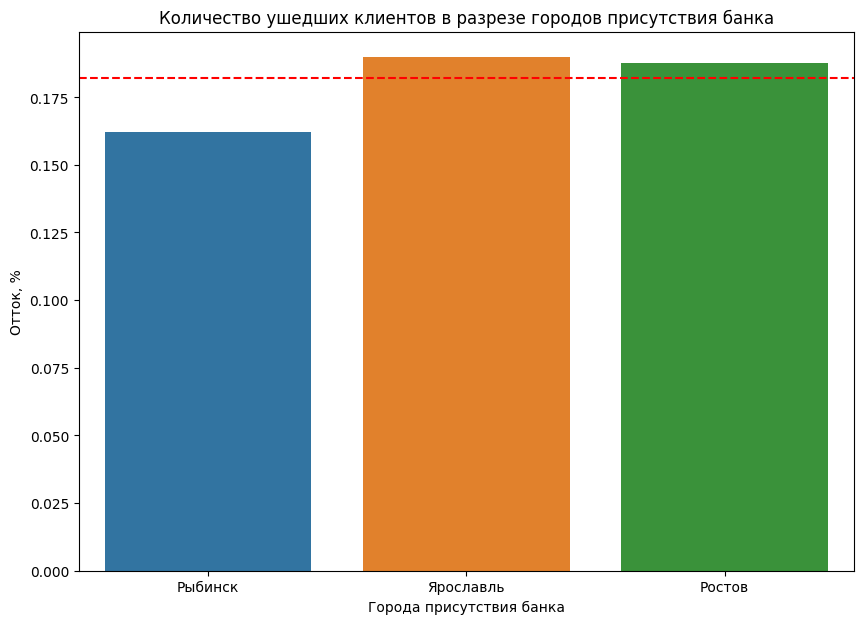

In [43]:
plt.figure(figsize=(10,7))
sns.barplot(x='city', y='churn', data=data, ci=None) 
plt.axhline(y=0.182, color='red', linestyle='--')
plt.title('Количество ушедших клиентов в разрезе городов присутствия банка')
plt.ylabel('Отток, %')
plt.xlabel('Города присутствия банка')
plt.show()

**По количественному значению больше всех клиентов ушло из филиала в Ярославле (1117 человек), на втором месте Рыбинск (437 ушедших клиентов), далее Ростов (266 ушедших клиентов). В процентом отношении количество текущих клиентов и количество "отточников" в разрезе городов присутствия банка распределены равномерно. В Ярославле и Ростове количество ушедших клиентов несущественно превышает процент среднего оттока по банку, который составляет 18.2%. В Рыбинке процент ушедших клиентов меньше, чем средний отток по банку.**

### Половозрастное распределение клиентов в общей совокупности и по оттоку.

In [44]:
# формирование таблицы полового распределения всей совокупности клиентов банка
data.groupby('gender').agg({'user_id':'count'})

,user_id
gender,
Ж,4995
М,5005


**По половому признаку клиенты банка распределены практически в отношении 50 на 50. В общей совокупности обслуживается одинаковое количество мужчин и женщин.**

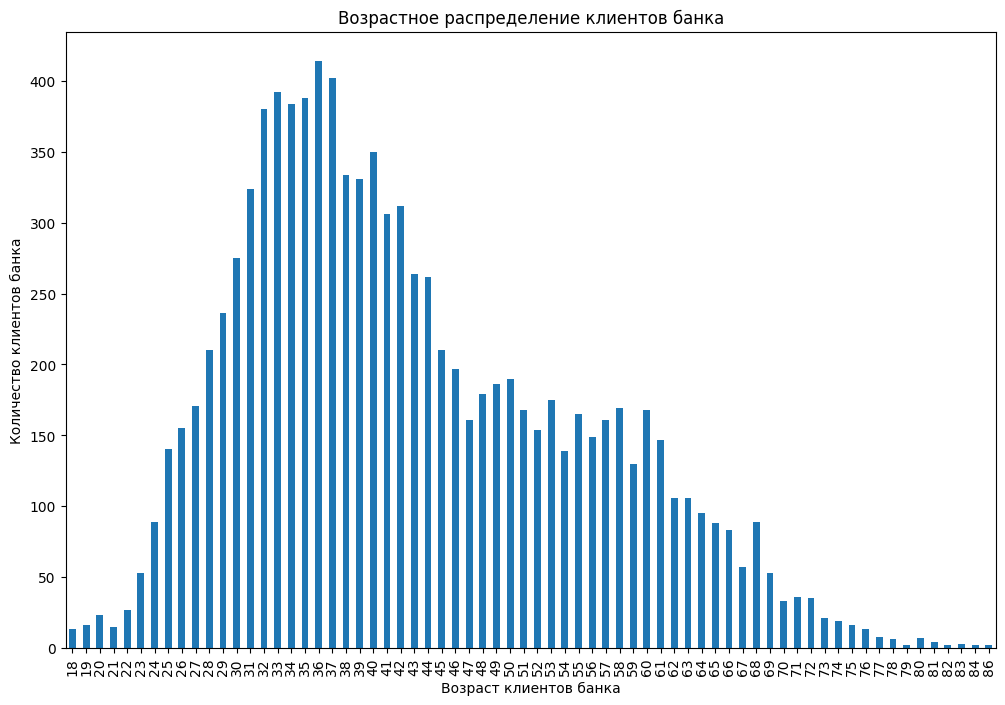

In [45]:
data.groupby('age').agg({'user_id':'count'}).plot(kind='bar', figsize=(12,8), legend = False)
plt.title('Возрастное распределение клиентов банка')
plt.ylabel('Количество клиентов банка')
plt.xlabel('Возраст клиентов банка')
plt.show()

**Возраст клиентов банка от 18 до 86 лет. Основная возрастная категория - от 30 до 44 лет.**

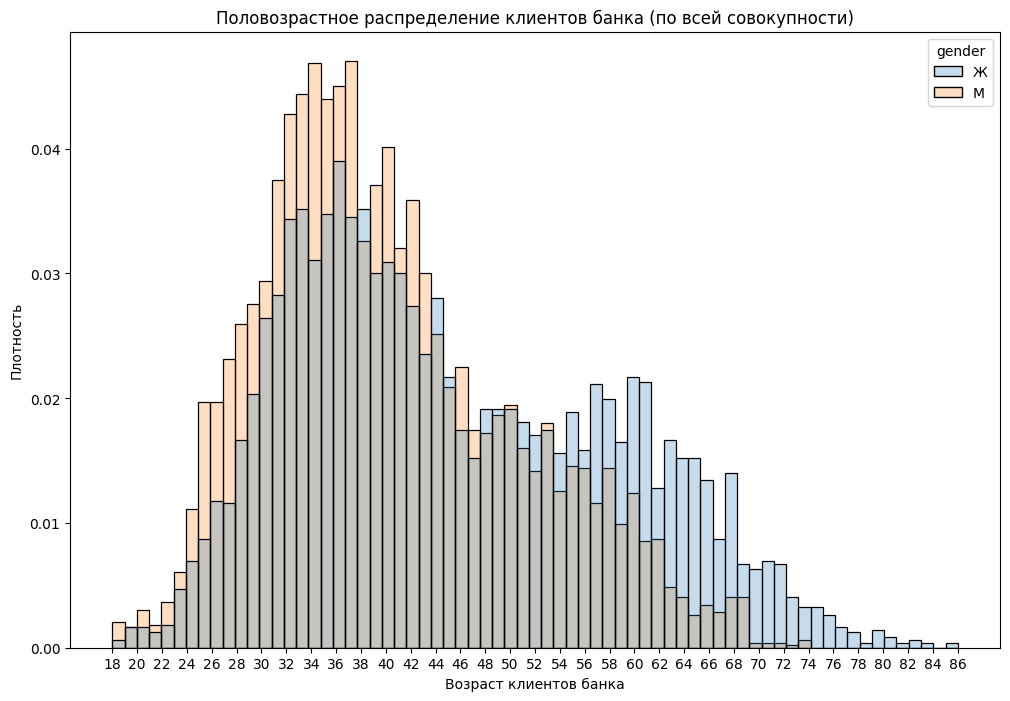

In [46]:
plt.figure(figsize=(12,8))
sns.histplot(x='age', hue='gender', data=data, stat="density", common_norm=False, alpha = 0.25, bins=69).\
set_xticks(range(18,87,2))
plt.title('Половозрастное распределение клиентов банка (по всей совокупности)')
plt.ylabel('Плотность')
plt.xlabel('Возраст клиентов банка')
plt.show()

**По общей совокупности клиентской базы можно обнаружить следующие факты: плотность клиентов-мужчин выше в возрастной категории 18-47 лет, плотность клиентов-женщин выше в возрастной категории 48-86 лет.**

**Посмотрим половозрастное распределение клиентов в разрезе оттока.**

In [47]:
# формирование таблицы полового распределения клиентов банка в разрезе "действующий клиент - отток"
age = data.pivot_table(index='churn', columns='gender', values='user_id', aggfunc='count')
age.index = ['Действующие', 'Отток']
age['Ж, в %'] = age['Ж'] / age['Ж'].sum() * 100
age['М, в %'] = age['М'] / age['М'].sum() * 100
age

gender,Ж,М,"Ж, в %","М, в %"
Действующие,4358,3822,87.25,76.36
Отток,637,1183,12.75,23.64


**Мужчины более склонны уходить из банка, чем женщины. Процент оттока мужчин 23,64% (выше среднего оттока клиентов в 18,2%).**

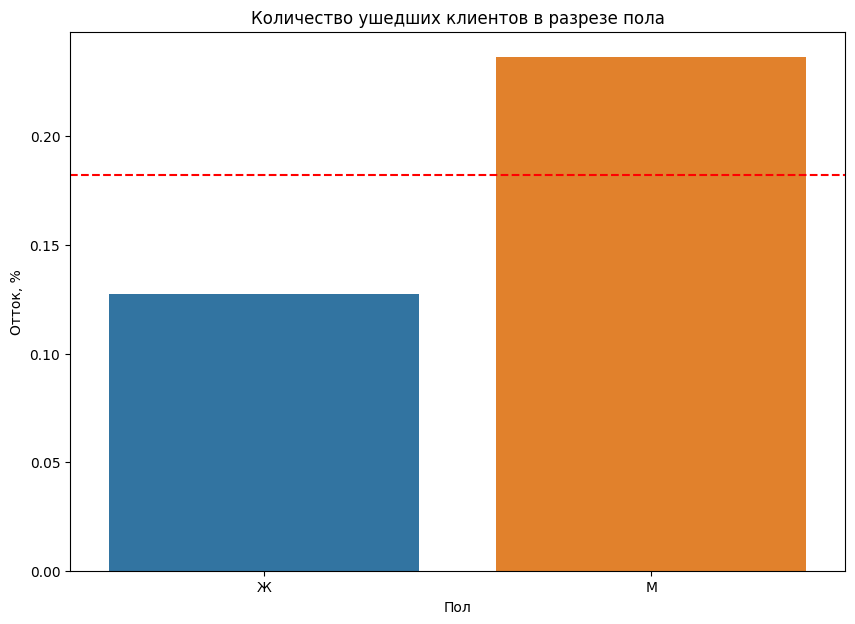

In [48]:
plt.figure(figsize=(10,7))
sns.barplot(x='gender', y='churn', data=data, ci=None) 
plt.axhline(y=0.182, color='red', linestyle='--')
plt.title('Количество ушедших клиентов в разрезе пола')
plt.ylabel('Отток, %')
plt.xlabel('Пол')
plt.show()

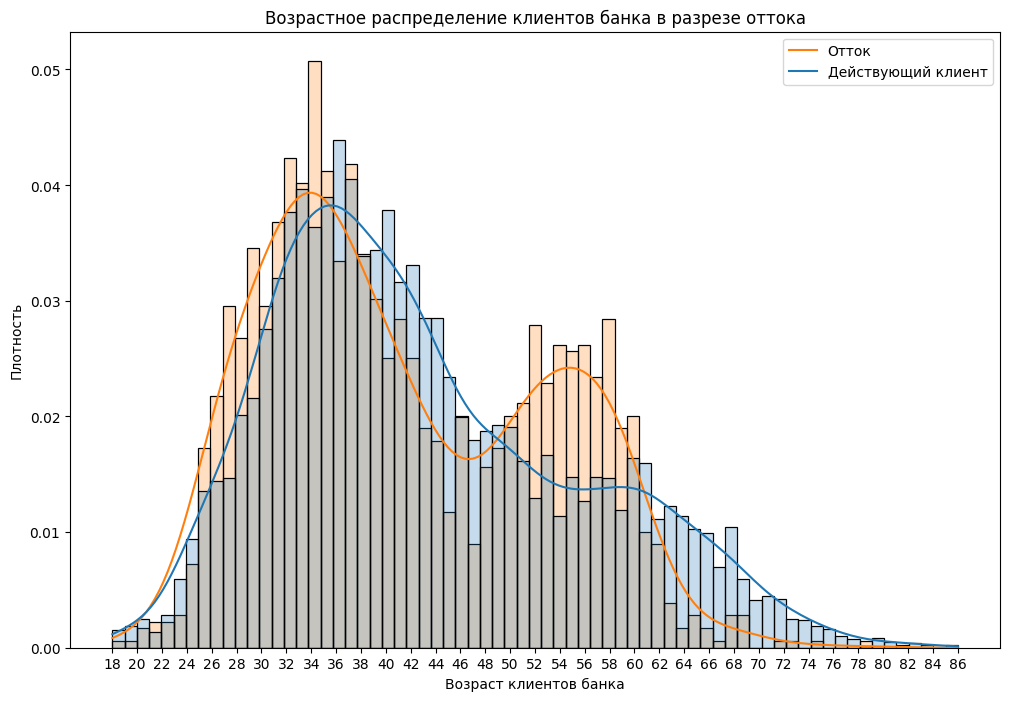

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(x='age', hue='churn', data=data, stat="density", common_norm=False, alpha = 0.25, bins=69, kde=True).\
set_xticks(range(18,87,2))
plt.title('Возрастное распределение клиентов банка в разрезе оттока')
plt.ylabel('Плотность')
plt.xlabel('Возраст клиентов банка')
plt.legend(title= None, labels=['Отток', 'Действующий клиент'])
plt.show()

**По плотности распределения клиентов-отточников больше в возрате 25-36 лет, 50-61 год.**

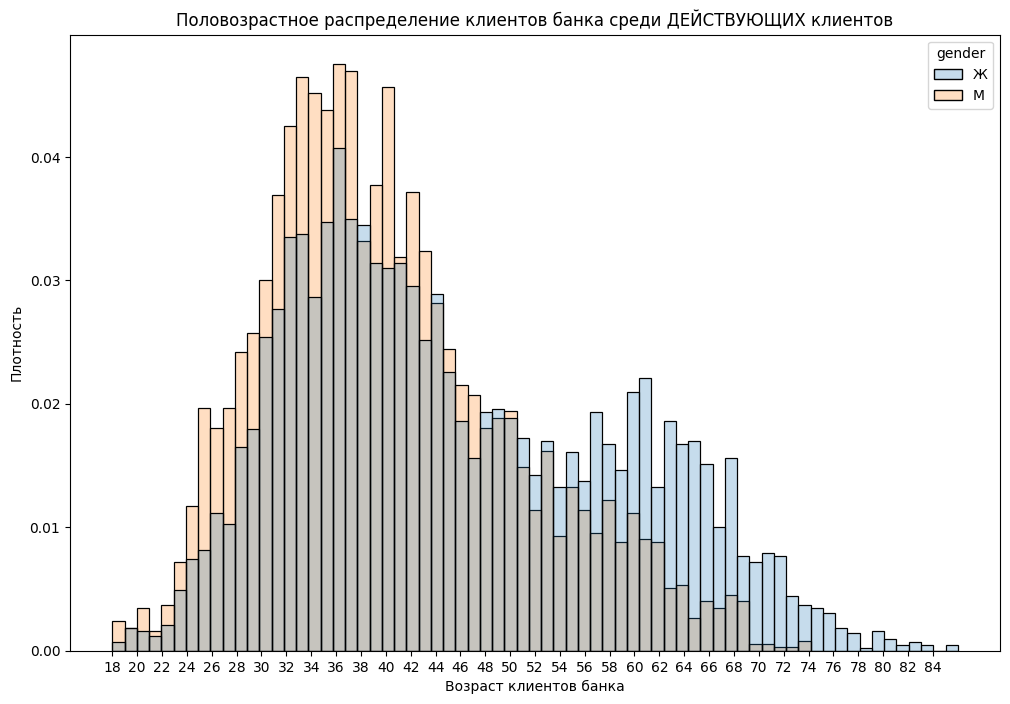

In [50]:
plt.figure(figsize=(12,8))
sns.histplot(x='age', hue='gender', data= data.query('churn == 0'), stat="density", common_norm=False, alpha = 0.25, bins=69).\
set_xticks(range(18,86,2))
plt.title('Половозрастное распределение клиентов банка среди ДЕЙСТВУЮЩИХ клиентов')
plt.ylabel('Плотность')
plt.xlabel('Возраст клиентов банка')
plt.show()

**Среди действующих клиентов банка плотность клиентов-мужчин больше в возрасте от 18 до 47 лет, плотность клиентов-женщин больше в возрасте от 51 года до 86 лет. Что в целом, соотвутствует графику выше по половозрастному распределению клиентов банка по всей совокупности данных.**

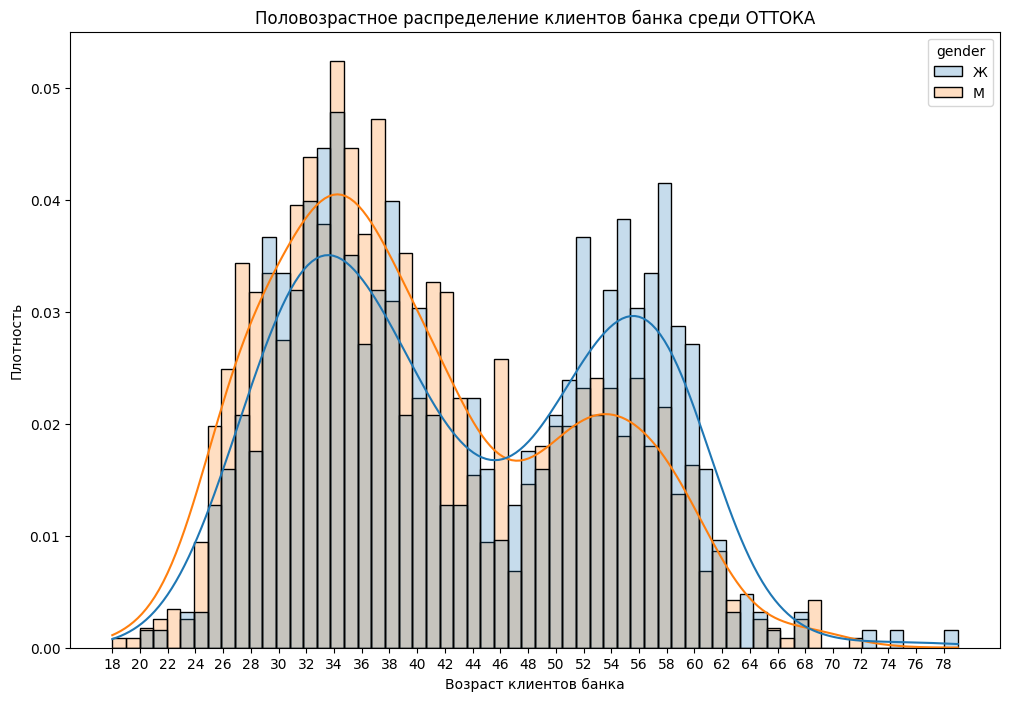

In [51]:
plt.figure(figsize=(12,8))
sns.histplot(x='age', hue='gender', data= data.query('churn == 1'), stat="density", common_norm=False, alpha = 0.25, bins=62,\
            kde=True).set_xticks(range(18,79,2))
plt.title('Половозрастное распределение клиентов банка среди ОТТОКА')
plt.ylabel('Плотность')
plt.xlabel('Возраст клиентов банка')
plt.show()

**В разрезе оттока плотность клиентов-мужчин преобладает в возрасте 21-28 лет, 31-32 года, 35-37 лет, 39 лет, 41-43 года, 46 лет. В разрезе оттока плотность клиентов-женщин преобладает в возрасте 29-30 лет, 33 года, 38 лет, 40 лет, 44-45 лет, 47-48 лет, 50-65 лет, 73-86 лет.**

### Изучение количества баллов собственности (минимальные и максимальные значения, среднее) - для всех пользователей и для оттока.

In [52]:
data['equity'].describe()

count   10000.00
mean        2.63
std         1.98
min         0.00
25%         0.00
50%         3.00
75%         4.00
max         9.00
Name: equity, dtype: float64

**Минимальное число баллов собственности 0, максимальное число баллов собственности 9, медианное значение 3 балла (расчёт по всей совокупности клиентов).**

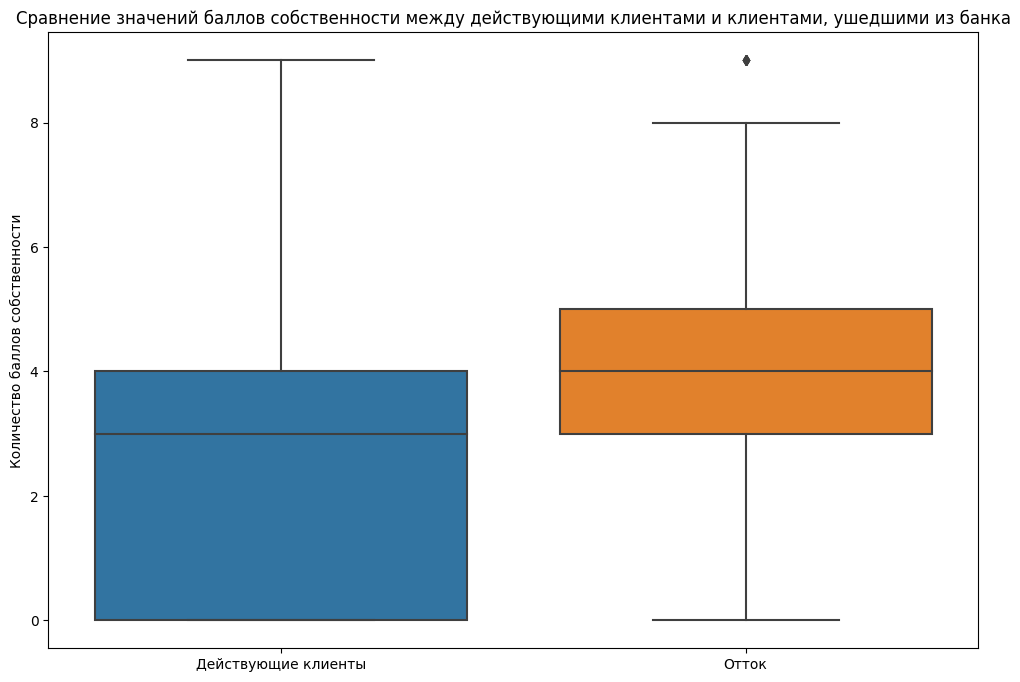

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x='churn', y='equity', data= data).set_xticklabels(('Действующие клиенты','Отток'))
plt.title('Сравнение значений баллов собственности между действующими клиентами и клиентами, ушедшими из банка')
plt.ylabel('Количество баллов собственности')
plt.xlabel(None)
plt.show()

**По действующим клиентам первый квартиль начинается с минимального значения и равен 0 баллов собственности, максимальное значение 9 баллов, медианное значение 3 балла, третий квартиль закрывается на 4-х баллах собственности. По клиентам-отточникам минимальное значение 0 баллов, максимальное значение 8 баллов. Однако, первый квартиль у отточников начинается с 3-х баллов, а медиана равняется 4-м баллам (у действующих клиентов это 3 квартиль), третий квартиль у отточников = 5 баллам.**

**При рассмотрении баллов кредитного скоринга среди клиентов-отточников также были клиенты с лучшим скорингом по сравнению с действующими клиентами. Таким образом, можно сделать вывод, что из банка уходят платёжеспособные клиенты с хорошим кредитным рейтингом и обеспечением.**

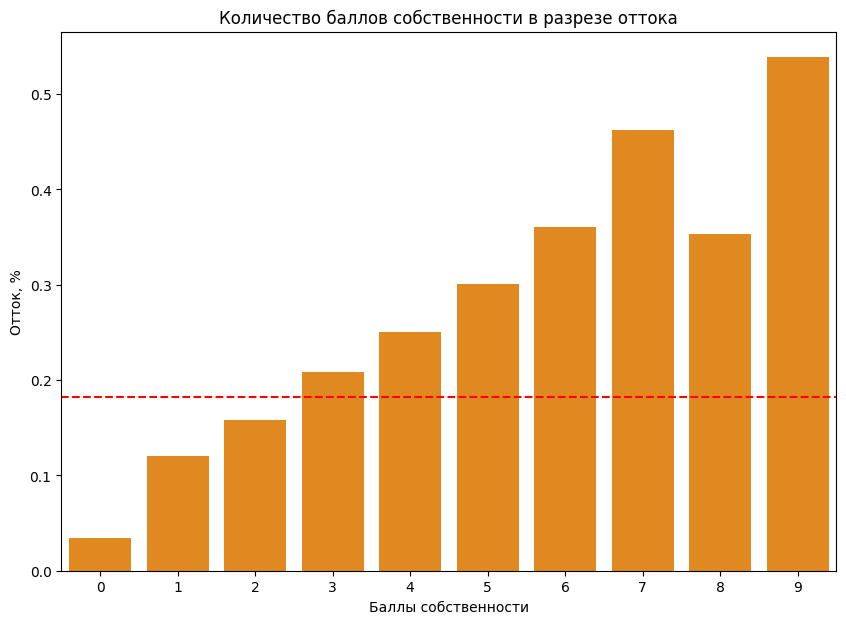

In [54]:
plt.figure(figsize=(10,7))
sns.barplot(x='equity', y='churn', data=data, ci=None, color = 'darkorange') 
plt.axhline(y=0.182, color='red', linestyle='--')
plt.title('Количество баллов собственности в разрезе оттока')
plt.ylabel('Отток, %')
plt.xlabel('Баллы собственности')
plt.show()

**Гистограмма показывает, что превышение плотности отточников перед действующими клиентами начинается с 3 баллов. Основные пики оттока приходятся на 7 и 9 баллов.**

### Изучение показателя баланса для всех пользователей и для оттока.

In [55]:
data['balance'].describe()

count        7705.00
mean       827794.31
std       1980614.15
min             0.00
25%        295554.16
50%        524272.20
75%        980705.85
max     119113552.01
Name: balance, dtype: float64

**Значения баланса очень различаются. Минимальное значение 0 рублей, максимальное 119 млн рублей, медианное значение 524 тыс.рублей. Баланс включает в себя как средства на текущем карточном счёте, так и депозиты и иные вложения. Значения после третьего квартиля, выраженные в десятках млн рублей, очевидно, принадлежат ВИП-клиентам (в удержании которых банк несомненно заинтересован).**

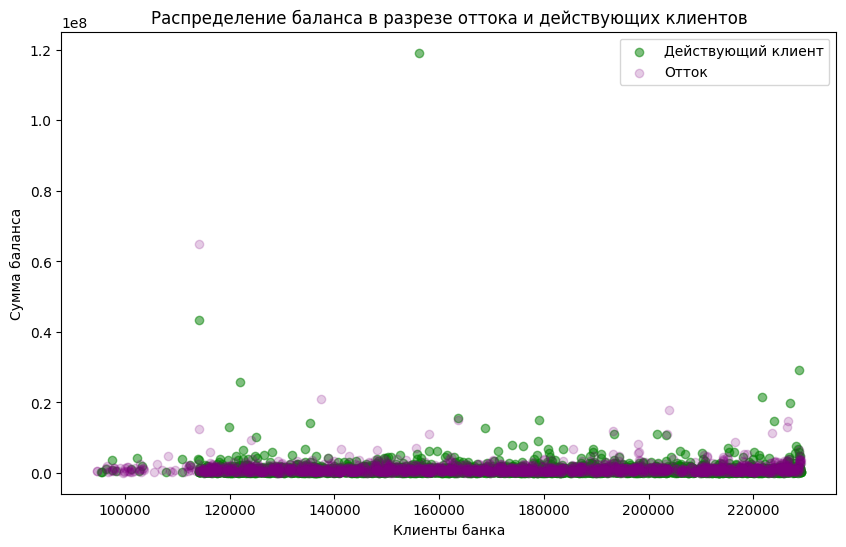

In [56]:
plt.figure(figsize=(10,6))
plt.scatter('user_id', 'balance', data= data.query('churn == 0'), c= 'green', alpha = 0.5)
plt.scatter('user_id', 'balance', data= data.query('churn == 1'), c= 'purple', alpha = 0.2)
plt.legend(labels=['Действующий клиент', 'Отток'])
plt.title('Распределение баланса в разрезе оттока и действующих клиентов')
plt.ylabel('Сумма баланса')
plt.xlabel('Клиенты банка')
plt.show()

**Самый большой большой баланс у действующего клиента. Среди клиентов, которых можно отнести к ВИП-сегменту, есть как отток, так и действующие клиенты.**

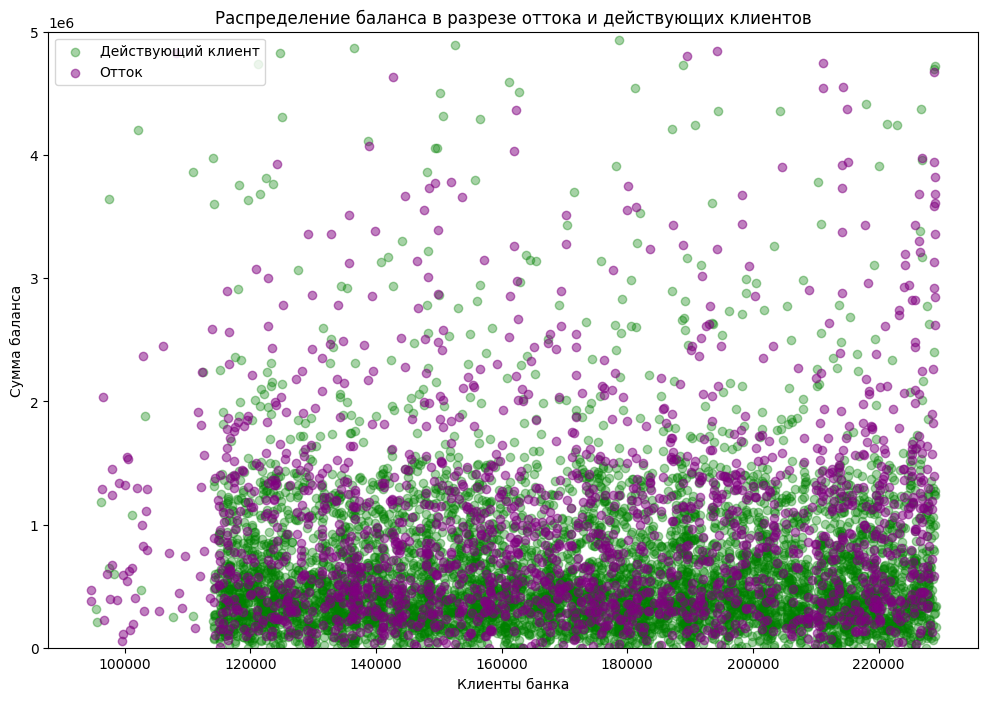

In [57]:
plt.figure(figsize=(12,8))
plt.scatter('user_id', 'balance', data= data.query('churn == 0'), c= 'green', alpha = 0.35)
plt.scatter('user_id', 'balance', data= data.query('churn == 1'), c= 'purple', alpha = 0.5)
plt.legend(labels=['Действующий клиент', 'Отток'])
plt.ylim(0, 5000000)
plt.title('Распределение баланса в разрезе оттока и действующих клиентов')
plt.ylabel('Сумма баланса')
plt.xlabel('Клиенты банка')
plt.show()

**По графику scatter можно сделать вывод лишь о том, что клиенты как действующие, так и ушедшие, имеют широкое распределение значений баланса. Сложно сделать вывод о преобладании одной из групп клиентов над другой.**

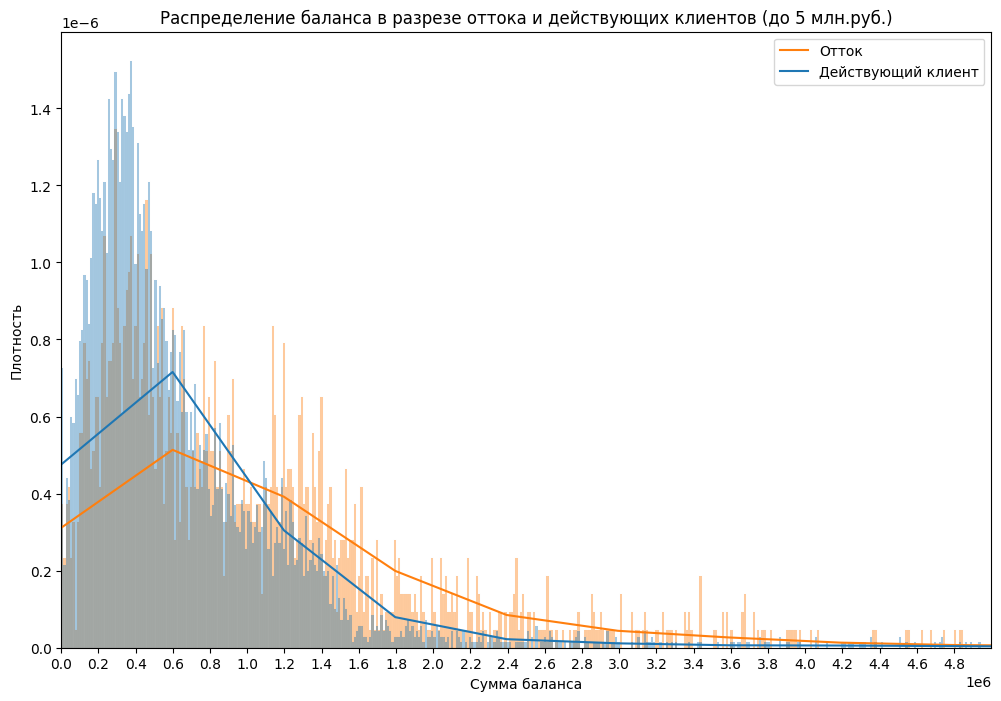

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(x='balance', hue='churn', data= data, stat="density", common_norm=False, alpha = 0.4, bins=10000, kde=True)
plt.xticks(np.arange(0,5000000,200000))
plt.xlim(0, 5000000)
plt.title('Распределение баланса в разрезе оттока и действующих клиентов (до 5 млн.руб.)')
plt.ylabel('Плотность')
plt.xlabel('Сумма баланса')
plt.legend(labels=['Отток', 'Действующий клиент'])
plt.show()

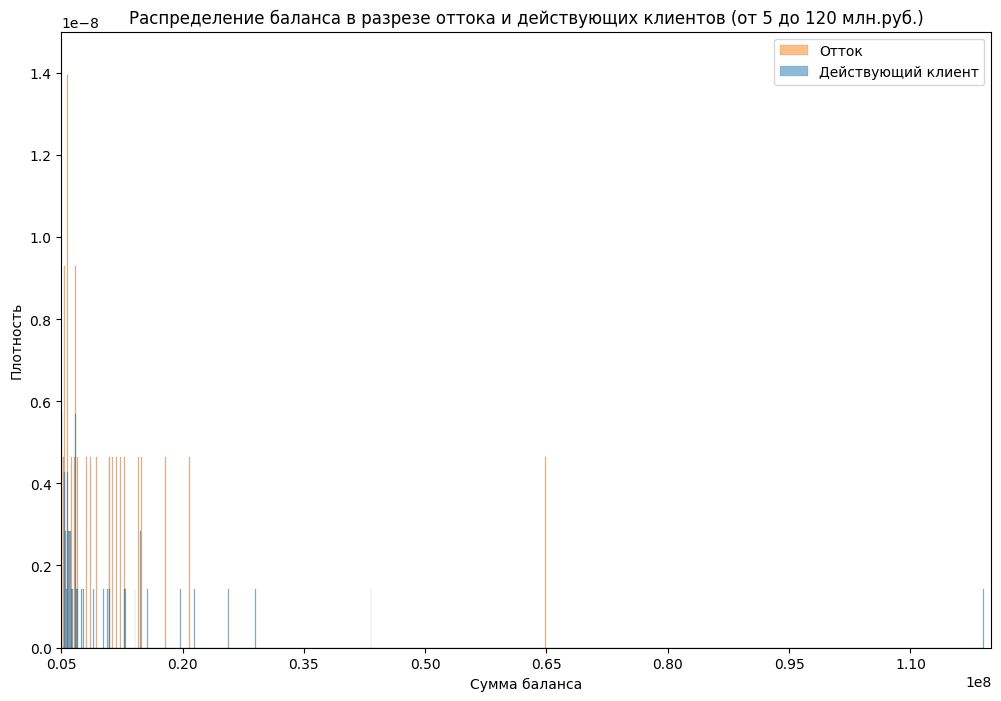

In [59]:
plt.figure(figsize=(12,8))
sns.histplot(x='balance', hue='churn', data= data, stat="density", common_norm=False, alpha = 0.5, bins=1000)
plt.xticks(np.arange(5000000,145000000, 15000000))
plt.xlim(5000000,120000000)
plt.ylim(0,0.000000015)
plt.title('Распределение баланса в разрезе оттока и действующих клиентов (от 5 до 120 млн.руб.)')
plt.ylabel('Плотность')
plt.xlabel('Сумма баланса')
plt.legend(labels=['Отток', 'Действующий клиент'])
plt.show()

**Превышение плотности оттока над действующими клиентами начинается с суммы баланса ~ 1.1 млн.рублей. По клиентам, которых можно отнести к сегменту ВИП, с балансом более 5 млн.рублей также наблюдается превышение плотности оттока над действующими клиентами.**

In [60]:
data['balance'].isna().sum()

2295

In [61]:
data.query('churn == 0')['balance'].isna().sum()

2282

In [62]:
data.query('churn == 1')['balance'].isna().sum()

13

**Также следует оговорить, что в столбце 'balance' присутствуют 2295 пропусков, что составляет 22.95% от всех данных. На действующих клиентов приходится 2282 пропуска, на отток всего 13 пропусков. Данные, распределённые в разрезе "действующий клиент - отток" изначально имеют разное количественное представление. Действующих клиентов в данных указано 8180 человек, ушедших 1820 человек. С учётом пропусков в столбце 'balance' действующие клиенты представлены в количестве 5898 человек, отточники 1807 человек. Поэтому выводы возможно сделать только по имеющимся в распоряжении данным. А именно - с суммы баланса ~ 1.1 млн.рублей начинается отток клиентов банка.**

### Изучение показателя "количество используемых продуктов" для всех пользователей и для оттока.

In [63]:
data['products'].describe()

count   10000.00
mean        1.87
std         0.79
min         0.00
25%         1.00
50%         2.00
75%         2.00
max         5.00
Name: products, dtype: float64

**Минимальное количество используемых продуктов 0, максимальное количество используемых продуктов 5, медианное значение 2 продукта (расчёт по всей совокупности клиентов).**

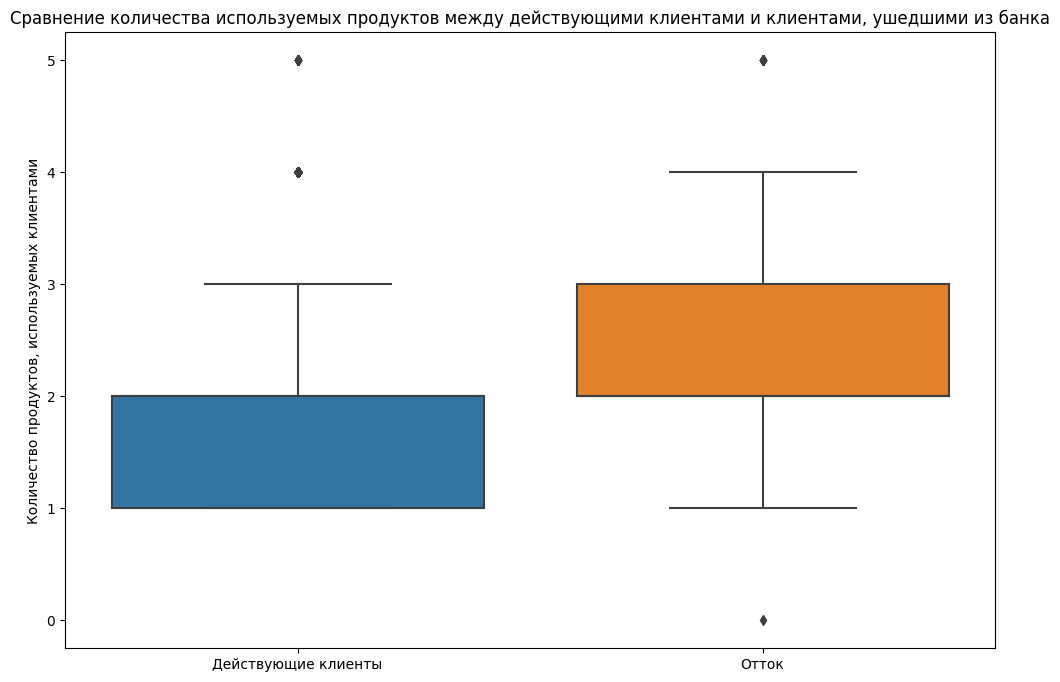

In [64]:
plt.figure(figsize=(12,8))
sns.boxplot(x='churn', y='products', data= data).set_xticklabels(('Действующие клиенты','Отток'))
plt.title('Сравнение количества используемых продуктов между действующими клиентами и клиентами, ушедшими из банка')
plt.ylabel('Количество продуктов, используемых клиентами')
plt.xlabel(None)
plt.show()

**У действующих клиентов минимальное количество используемых продуктов и первый квартиль = 1 продукту, третий квартиль равен 2 продуктам, максимальное значение 3 продукта. У клиентов, ушедших из банка, минимальное значение = 1 продукту, первый квартиль = 2 продуктам, третий квартиль = 3 продуктам, максимальное значение 4 продукта.**

**Следует отметить, что встречаются клиенты, у которых количество продуктов = 0. Но, чтобы быть клиентом банка необходимо иметь, хотя бы один продукт; должен быть заключен договор с банком на оказание какой-либо услуги. Эти нулевые значения отражены на графике boxplot как выбросы для ушедших клиентов. Посмотрим по срезу более подробно на количество клиентов в product =0, а затем удалим данные строки.**

In [65]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,na_balance,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль,gender_copy_Ж,gender_copy_М
8957,147837,962.00,Рыбинск,Ж,79,3,NaN,0,0,0,25063.96,1,1,0,1,0,1,0


In [66]:
len(data)

10000

In [67]:
data = data.drop(index = 8957)

In [68]:
len(data)

9999

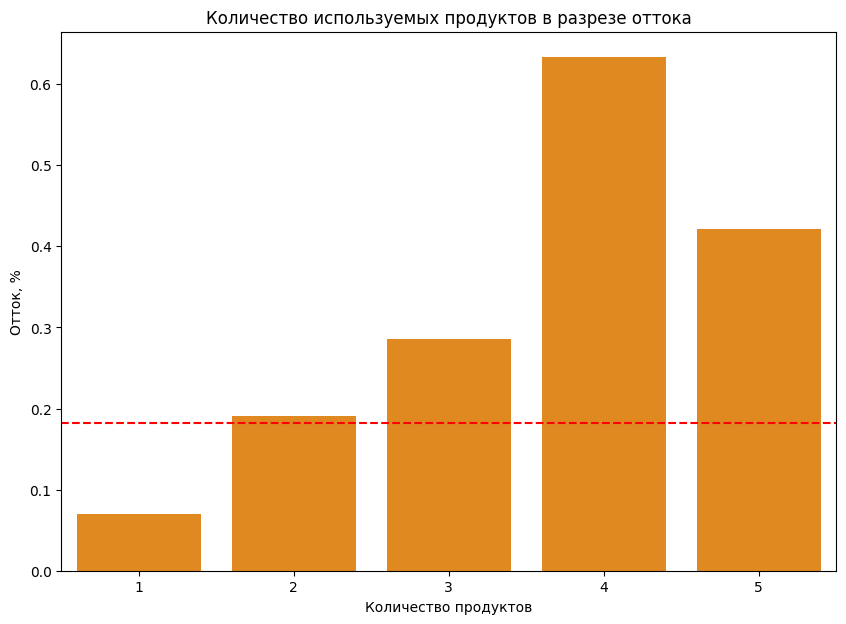

In [69]:
plt.figure(figsize=(10,7))
sns.barplot(x='products', y='churn', data=data, ci=None, color = 'darkorange') 
plt.axhline(y=0.182, color='red', linestyle='--')
plt.title('Количество используемых продуктов в разрезе оттока')
plt.ylabel('Отток, %')
plt.xlabel('Количество продуктов')
plt.show()

**С двух используемых продуктов начинается превышение оттока над действующими клиентами. Основой пик оттока приходится на клиентов с 4-мя продуктами.**

### Изучение показателя "использование кредитной карты" для всех пользователей и для оттока.

In [70]:
# 0 - у клиента отсутствует кредитная карта, 1 - у клиента имеется кредитная карта
cc = data.groupby('credit_card').agg({'user_id':'count'})
cc.index = ['НЕТ кред.карты', 'ЕСТЬ кред.карта']
cc['% CC'] = cc['user_id'] / cc['user_id'].sum() * 100
cc

,user_id,% CC
НЕТ кред.карты,3195,31.95
ЕСТЬ кред.карта,6804,68.05


**Среди всей совокупности клиентов имеются кредитную карту 6804 человека, или 68%, не имеют кредитной карты 3196 человек, или 31,96%.**

In [71]:
# формирование сводной таблицы по наличию или отсутствию кредитной карты в разрезе оттока 
cc_ch = data.pivot_table(index='churn', columns = 'credit_card', values='user_id', aggfunc='count').reset_index(drop=True)
cc_ch.index = ['Действ.клиенты', 'Отток']
cc_ch.columns = ['NOT CC', 'WITH CC']
cc_ch['Total (NOT cc + WITH cc)'] = cc_ch['NOT CC'] + cc_ch['WITH CC']
cc_ch['% not cc'] = cc_ch['NOT CC'] / cc_ch['Total (NOT cc + WITH cc)'] * 100
cc_ch['% with cc'] = cc_ch['WITH CC'] / cc_ch['Total (NOT cc + WITH cc)'] * 100
cc_ch

,NOT CC,WITH CC,Total (NOT cc + WITH cc),% not cc,% with cc
Действ.клиенты,2379,5801,8180,29.08,70.92
Отток,816,1003,1819,44.86,55.14


**Среди действующих клиентов банка нет кредитной карты у 2379 человек (29% от действующих клиентов), оформлена кредитная карта у 5801 человека (71% от дейстующих клиентов). У ушедших клиентов не было кредитной карты у 817 человек (44.9% оттока), были оформлены кредитные карты у 1003 человек (55.1% оттока). Таким образом, среди клиентов-отточников продукт "кредитная карта" пользовался меньшим спросом.**

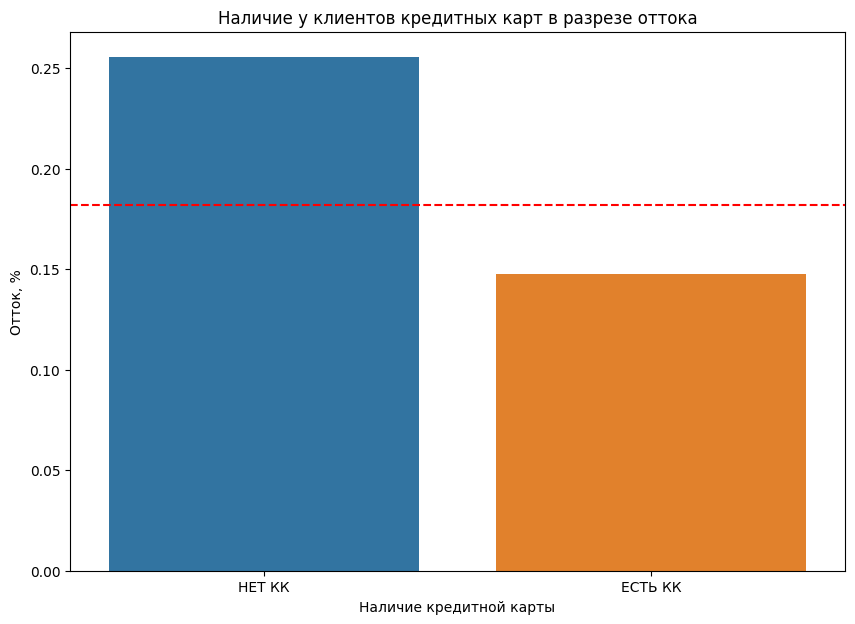

In [72]:
plt.figure(figsize=(10,7))
sns.barplot(x='credit_card', y='churn', data=data, ci=None)
plt.axhline(y=0.182, color='red', linestyle='--')
plt.title('Наличие у клиентов кредитных карт в разрезе оттока')
plt.ylabel('Отток, %')
plt.xlabel('Наличие кредитной карты')
plt.xticks(ticks=[0,1], labels=['НЕТ КК','ЕСТЬ КК'])
plt.show()

**График наглядно подтверждает написанный выше вывод о том, что клиенты, у которых не оформлена кредитная карта, более склонны к уходу из банка.**

### Изучение показателя "активный клиент" для всех пользователей и для оттока.

In [73]:
# 0 - клиент не является активным, 1 - активный клиент
la = data.groupby('last_activity').agg({'user_id':'count'})
la.index = ['НЕ активный клиент', 'АКТИВНЫЙ клиент']
la['%'] = la['user_id'] / la['user_id'].sum() * 100
la

,user_id,%
НЕ активный клиент,4764,47.64
АКТИВНЫЙ клиент,5235,52.36


**Среди всех клиентов число неактивных клиентов составляет 4765 человек (или 47,65% от всех клиентов), число активных клиентов составляет 5235 человек (или 52,35% от всех клиентов).**

In [74]:
# формирование сводной таблицы по клиентской активности в разрезе оттока 
la_ch = data.pivot_table(index='churn', columns = 'last_activity', values='user_id', aggfunc='count').reset_index(drop=True)
la_ch.index = ['Действ.клиенты', 'Отток']
la_ch.columns = ['NOT active', 'Active']
la_ch['Total (NOT active + Active)'] = la_ch['NOT active'] + la_ch['Active']
la_ch['% NOT active'] = la_ch['NOT active'] / la_ch['Total (NOT active + Active)'] * 100
la_ch['% Active'] = la_ch['Active'] / la_ch['Total (NOT active + Active)'] * 100
la_ch

,NOT active,Active,Total (NOT active + Active),% NOT active,% Active
Действ.клиенты,4223,3957,8180,51.63,48.37
Отток,541,1278,1819,29.74,70.26


**Среди действующих клиентов число активных клиентов 3957 человек (или 48.3% от действующих клиентов), число неактивных клиентов 4223 человека (или 51.7% от действующих клиентов). Среди ушедших из банка клиентов число активных клиентов составило 1278 человек (или 70.2% от оттока), число неактивных клиентов составляло 542 клиента (или 29.8% от оттока).**

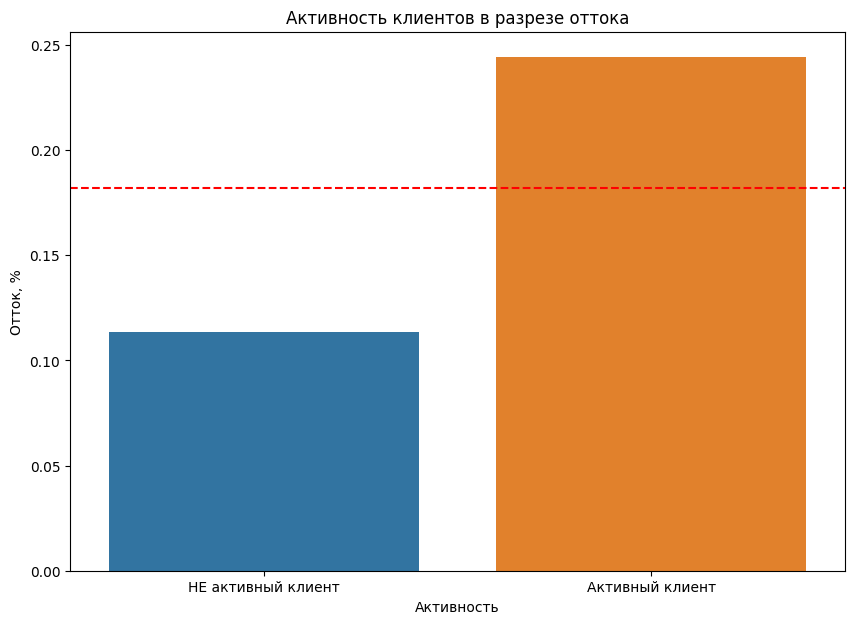

In [75]:
plt.figure(figsize=(10,7))
sns.barplot(x='last_activity', y='churn', data=data, ci=None)
plt.axhline(y=0.182, color='red', linestyle='--')
plt.title('Активность клиентов в разрезе оттока')
plt.ylabel('Отток, %')
plt.xlabel('Активность')
plt.xticks(ticks=[0,1], labels=['НЕ активный клиент', 'Активный клиент'])
plt.show()

**Активные клиенты более склонны к уходу из банка, чем неактивные клиенты.**

### Изучение показателя зарплаты для всех пользователей и для оттока.

In [76]:
data['est_salary'].describe()

count      9999.00
mean     147879.17
std      139390.07
min        2546.30
25%       75252.12
50%      119661.51
75%      174501.12
max     1395064.45
Name: est_salary, dtype: float64

**По всей совокупности клиентов банка: минимальный размер подтверждённой зарплаты 2546.30 руб., максимальный размер подтверждённой зарплаты 1,39 млн.рублей, медианная зарплата - 119 тыс.рублей.**

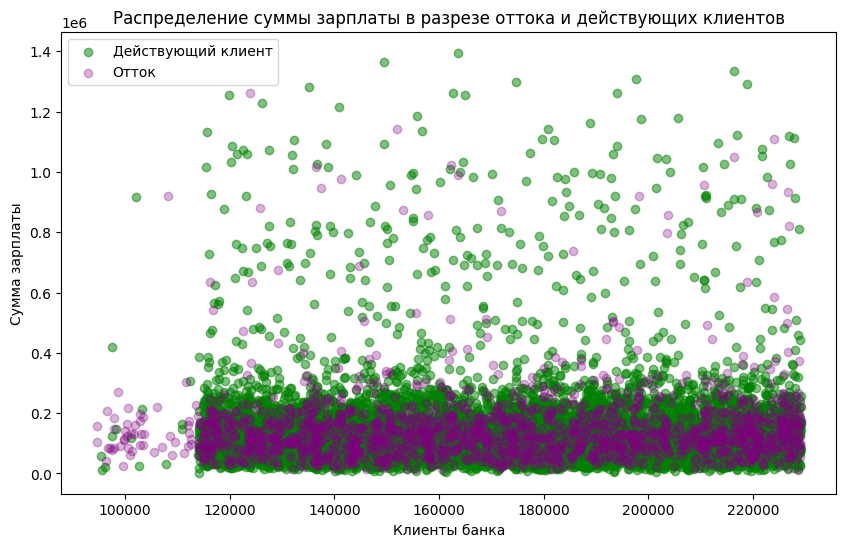

In [77]:
plt.figure(figsize=(10,6))
plt.scatter('user_id', 'est_salary', data= data.query('churn == 0'), c= 'green', alpha = 0.5)
plt.scatter('user_id', 'est_salary', data= data.query('churn == 1'), c= 'purple', alpha = 0.3)
plt.legend(labels=['Действующий клиент', 'Отток'])
plt.title('Распределение суммы зарплаты в разрезе оттока и действующих клиентов')
plt.ylabel('Сумма зарплаты')
plt.xlabel('Клиенты банка')
plt.show()

**В целом, уровень зарплат распределён достаточно равномерно между дейстующими клиентами банка и ушедшими клиентами.**

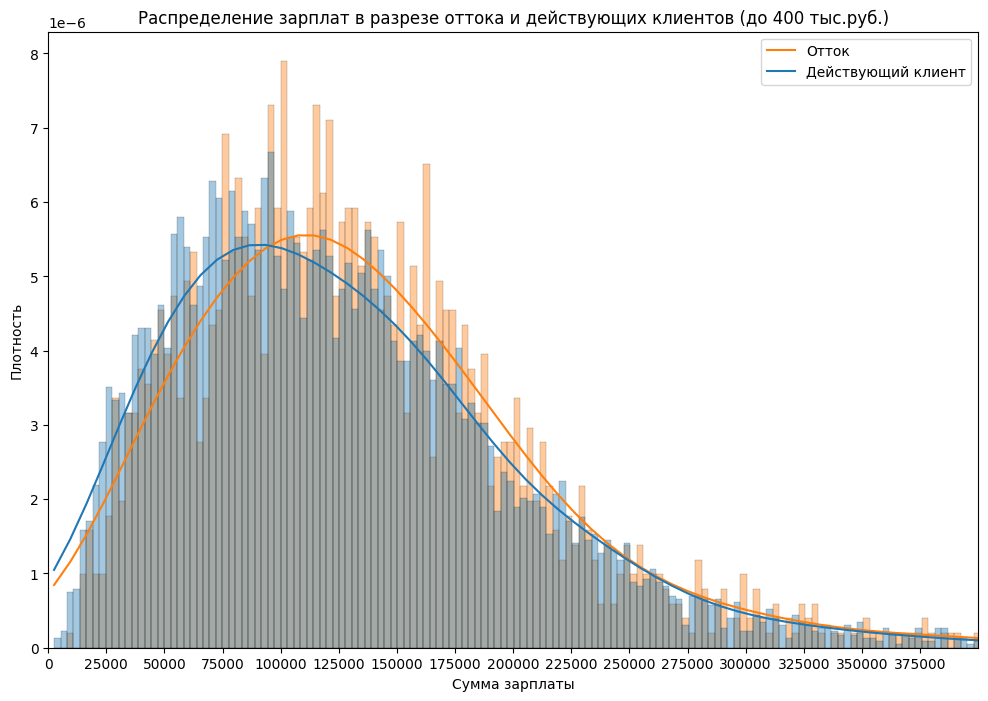

In [78]:
plt.figure(figsize=(12,8))
sns.histplot(x='est_salary', hue='churn', data= data, stat="density", common_norm=False, alpha = 0.4, bins=500, kde=True)
plt.xticks(np.arange(0,400000,25000))
plt.xlim(0, 400000)
plt.title('Распределение зарплат в разрезе оттока и действующих клиентов (до 400 тыс.руб.)')
plt.ylabel('Плотность')
plt.xlabel('Сумма зарплаты')
plt.legend(labels=['Отток', 'Действующий клиент'])
plt.show()

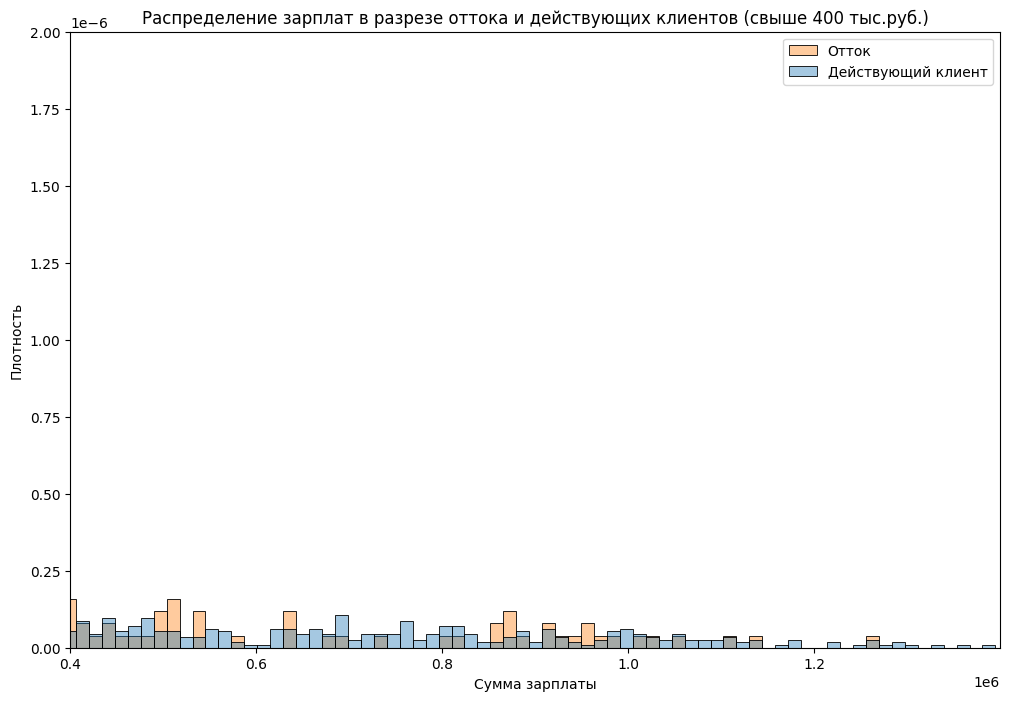

In [79]:
plt.figure(figsize=(12,8))
sns.histplot(x='est_salary', hue='churn', data= data, stat="density", common_norm=False, alpha = 0.4, bins=100)
plt.xticks(np.arange(400000, 1400000,200000))
plt.xlim(400000, 1400000)
plt.ylim(0,0.000002)
plt.title('Распределение зарплат в разрезе оттока и действующих клиентов (свыше 400 тыс.руб.)')
plt.ylabel('Плотность')
plt.xlabel('Сумма зарплаты')
plt.legend(labels=['Отток', 'Действующий клиент'])
plt.show()

**Для зарплат в размере от ~ 100 тыс. до 250 тыс. рублей есть некоторое превышение оттока над действующими клиентами. Однако, если сравнить полученные данные с аналогичными значениями для столбца 'balance', то для баланса свойственна более существенная и очевидная разница в средствах на счетах между действующими клиентами и отточниками.**

**Таким образом, в данном разделе было произведено детальное изучение данных, отражённых в каждом столбце таблицы (кредитный скоринг, город, пол, возраст, баллы собственности, количество используемых продуктов, наличие/отсутствие кредитной карты, клиентская активность, уровень подтверждённой зарплаты) в совокупности по всем клиентам банка и в разрезе оттока.**

## Анализ оттока клиентов банка.

### Формирование портретов клиента: склонного к уходу из банка и действующего клиента.

In [80]:
# Формирование портрета пользователя
portret = data.groupby('churn').agg({'est_salary':['mean', 'median'],
                           'balance':['mean', 'median'],
                           'age':'mean',
                           'gender':pd.Series.mode, 
                           'city':pd.Series.mode,
                           'products':'median', 
                           'equity':'median',
                           'score': 'mean',
                           'credit_card': pd.Series.mode,
                           'last_activity': pd.Series.mode,
                           'city_copy_Ростов': pd.Series.mode,
                           'city_copy_Рыбинск': pd.Series.mode,
                           'city_copy_Ярославль': pd.Series.mode,
                           'gender_copy_Ж': pd.Series.mode,
                           'gender_copy_М': pd.Series.mode}).transpose()

portret.columns = ['Current client', 'Churn']
portret['Difference'] = np.NaN

portret.iloc[:5, 2] = portret.iloc[:5, 1] / portret.iloc[:5, 0] * 100 - 100
portret.iloc[7:10, 2] = portret.iloc[7:10, 1] / portret.iloc[7:10, 0] * 100 - 100

portret

Current client      Churn Difference
est_salary          mean        147783.20  148310.73       0.36
                    median      118257.71  125395.22       6.04
balance             mean        733982.59 1133993.27      54.50
                    median      475382.45  782410.47      64.59
age                 mean            43.01      41.43      -3.68
gender              mode                Ж          М        NaN
city                mode        Ярославль  Ярославль        NaN
products            median              2          2       0.00
equity              median              3          4      33.33
score               mean           845.43     863.35       2.12
credit_card         mode                1          1        NaN
last_activity       mode                0          1        NaN
city_copy_Ростов    mode                0          0        NaN
city_copy_Рыбинск   mode                0          0        NaN
city_copy_Ярославль mode                1          1        NaN
gender_copy_Ж       mode                1          0        NaN
gender_copy_М       mode                0          1        NaN

**Данные, указанные в таблице выше по некоторым параметрам рассчитаны не только по среднему арифметическому, но и по медиане (т.к. данные имеют выбросы). Так по медиане рассчитаны показатели подтверждённой зарплаты и баланса. Кроме того, по медиане рассчитаны показатели "количество используемых продуктов" и "баллы собственности" для отображения значений в формате целых чисел. Возраст и кредитный скоринг рассчитаны по среднему арифметическому, пол, город, клиентская активность и наличие кредитной карты по моде.**

**Для портрета клиента, посчитанного на основании СРЕДНИХ значений, можно описать следующие характеристики для клиентов-отточников:**

- **размер подтверждённой зарплаты отточников составляет 125 тысяч рублей, что на 6% выше медианной зарплаты текущих клиентов в размере 118 тыс.рублей,**

- **размер баланса у клиентов-отточников составляет 782 тыс.рублей, что на 64,5% больше размера баланса текущих клиентов в размере 475 тыс.рублей,**

- **возраст клиентов-отточников составляет 41 год (младше на 2 года действующих клиентов, чей средний возраст равен 43 годам),**

- **пол: к уходу из банка более склонны мужчины, среди действующих клиентов по количеству больше преобладают женщины,**

- **город присутствия банка: Ярославль (как для оттока, так и для действующих клиентов),**

- **количество используемых продуктов: 2 продукта (как для оттока, так и для действующих клиентов),**

- **количество баллов собственности составляет для отточников 4 балла, что на 1 балл выше значений у действующих клиентов (3 балла),**

- **кредитный скоринг для клиентов-отточников составляет 863 балла, что на 2% выше, чем значение показателя у действующих клиентов (845 баллов),**
    
- **по моде у кредитной карты нет отличий между действующими и ушедшими из банка клиентами - у большинства клиентов кредитные карты имеются,**
    
- **активные клиенты более склонны к уходу из банка, среди действующих клиентов преобладают неактивные клиенты.**

**Также можно построить более расширенный портрет клиента-отточника на основании данных, полученных из графиков предыдушего раздела.**

In [81]:
# формирование расширенной таблицы с портретом клиента-отточника
portret_2 = pd.DataFrame({'Показатель': data.columns[1:-6],
                         'Анализ графиков' : np.NaN,
                         'Интервалы для оттока': np.NaN,
                         'Среднее значение портрета' : np.NaN})

# заполнение наблюдений для кредитной скоринга
portret_2.iloc[0, 1] = 'есть зависимость'
portret_2.iloc[0, 2] = 'интервал оттока от 820 до 940 баллов'
portret_2.iloc[0, 3] = 'медиана 863 балла'

# заполнение наблюдений для города
portret_2.iloc[1, 1] = 'существенной зависимости не обнаружено'
portret_2.iloc[1, 2] = 'доля оттока чуть выше в Ярославле, и чуть ниже в Рыбинске (разница не более 3,5%)'
portret_2.iloc[1, 3] = 'мода - Ярославль'

# заполнение наблюдений для пола
portret_2.iloc[2, 1] = 'есть зависимость'
portret_2.iloc[2, 2] = 'мужчины более склонны к уходу из банка'
portret_2.iloc[2, 3] = 'мода - М'

# заполнение наблюдений для возраста
portret_2.iloc[3, 1] = 'есть зависимость'
portret_2.iloc[3, 2] = 'более склонны к оттоку 25-36, 50-61 год (среди М 18-46 лет, среди Ж 46-68 лет)'
portret_2.iloc[3, 3] = 'средний возраст 41 год'

# заполнение наблюдений для баллов собственности
portret_2.iloc[4, 1] = 'есть зависимость'
portret_2.iloc[4, 2] = 'интервал оттока от 3 до 9 баллов'
portret_2.iloc[4, 3] = 'медианный балл - 4'

# заполнение наблюдений для баланса
portret_2.iloc[5, 1] = 'есть зависимость'
portret_2.iloc[5, 2] = 'интервал оттока начинается от 1,1 млн рублей и выше'
portret_2.iloc[5, 3] = 'медианный баланс 782 тыс.рублей'

# заполнение наблюдений для количества используемых продуктов
portret_2.iloc[6, 1] = 'есть зависимость'
portret_2.iloc[6, 2] = 'интервал оттока от 2 до 5 продуктов'
portret_2.iloc[6, 3] = 'медианный число продуктов - 2'

# заполнение наблюдений для наличия/отсутствия кредитной карты
portret_2.iloc[7, 1] = 'есть зависимость'
portret_2.iloc[7, 2] = 'клиенты БЕЗ кредитной карты более склонны к оттоку'

# заполнение наблюдений для клиентской активности
portret_2.iloc[8, 1] = 'есть зависимость'
portret_2.iloc[8, 2] = 'активные клиенты более склонны к оттоку'

# заполнение наблюдений для зарплаты
portret_2.iloc[9, 1] = 'есть некоторая зависимость'
portret_2.iloc[9, 2] = 'интервал оттока от 100 тыс. до 250 тыс.рублей'
portret_2.iloc[9, 3] = 'медианная зарплата 125 тыс.рублей'

In [82]:
portret_2

,Показатель,Анализ графиков,Интервалы для оттока,Среднее значение портрета
0,score,есть зависимость,интервал оттока от 820 до 940 баллов,медиана 863 балла
1,city,существенной зависимости не обнаружено,"доля оттока чуть выше в Ярославле, и чуть ниже в Рыбинске (разница не более 3,5%)",мода - Ярославль
2,gender,есть зависимость,мужчины более склонны к уходу из банка,мода - М
3,age,есть зависимость,"более склонны к оттоку 25-36, 50-61 год (среди М 18-46 лет, среди Ж 46-68 лет)",средний возраст 41 год
4,equity,есть зависимость,интервал оттока от 3 до 9 баллов,медианный балл - 4
5,balance,есть зависимость,"интервал оттока начинается от 1,1 млн рублей и выше",медианный баланс 782 тыс.рублей
6,products,есть зависимость,интервал оттока от 2 до 5 продуктов,медианный число продуктов - 2
7,credit_card,есть зависимость,клиенты БЕЗ кредитной карты более склонны к оттоку,NaN
8,last_activity,есть зависимость,активные клиенты более склонны к оттоку,NaN
9,est_salary,есть некоторая зависимость,интервал оттока от 100 тыс. до 250 тыс.рублей,медианная зарплата 125 тыс.рублей


**В расширенном портрете отражены выявленные отточные интервалы различных показателей, показано наличие зависимости/влияния показателя на формирование портрета клиента-отточника, а также для сравнения указаны средние значения портрета.**

### Корреляционный анализ.

**Проведём корреляционный анализ посредством метода corr(), который рассчитывает корреляцию Пирсона, а также посредством библиотеки phik. Для оценки значения корреляции будет использоваться шкала Чеддока (приведена ниже).**

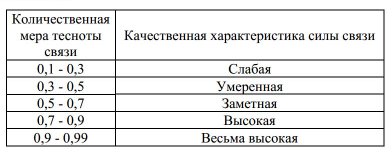

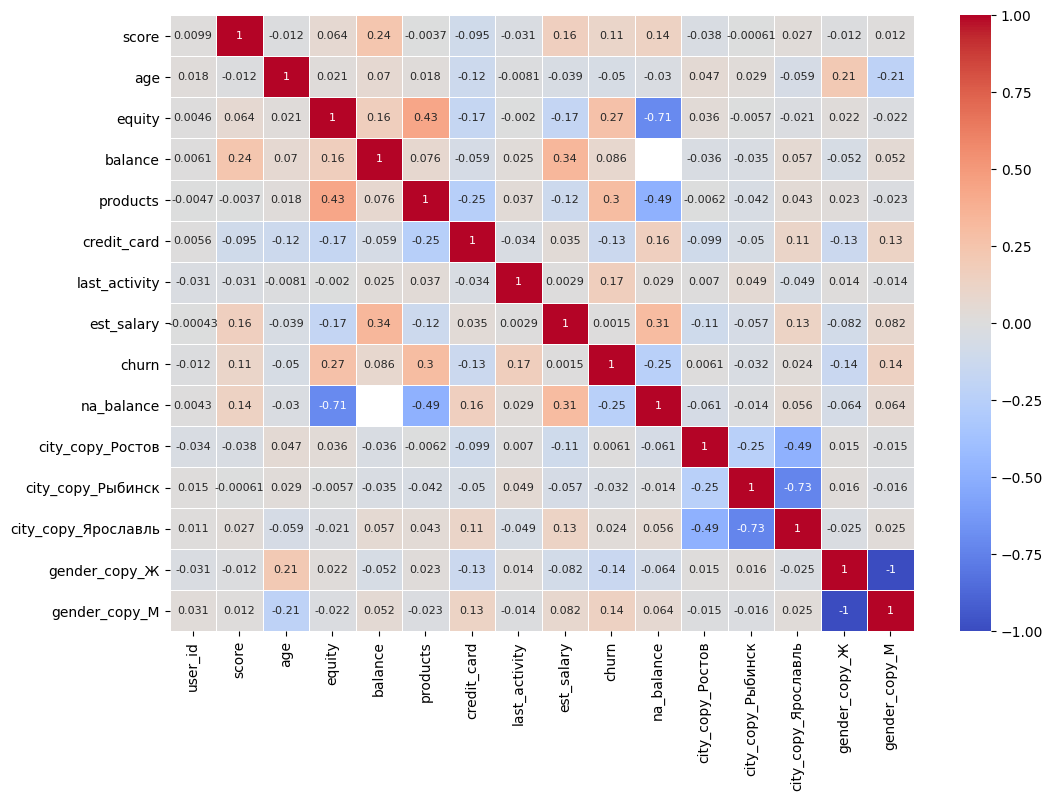

In [83]:
# расчёт корреляции Пирсона
plt.figure(figsize=(12,8))
data_corr = data.corr().drop('user_id')
sns.heatmap(data_corr, cmap='coolwarm', center=0, annot = True, annot_kws = {'size': 8}, linewidths=.5)
plt.show()

**Корреляция выявила умеренную зависимость (0,3 - 0,5) между следующими показателями:**

- **между количеством используемых продуктов и баллами собственности (0,43),**
- **между зарплатой и балансом (0,34),**
- **между УХОДОМ из банка и количеством продуктов (0,3).**

**Корреляция выявила слабую зависимость (0,1 - 0,3) между следующими показателями:**

- **между УХОДОМ и баллами собственности (0,27),**
- **между балансом и кредитный скорингом (0,24),**
- **половозрастную взаимосвязь по признаку женщины - возраст (0,21),**
- **между УХОДОМ из банка и активностью клиента (0,17),**
- **между зарплатой и кредитным скорингом (0,16),**
- **между УХОДОМ из банка и полом клиентов - мужчины (0,14)**,
- **между наличием кредитной карты и полом клиентов - мужчины (0,13),**
- **между размером зарплаты и городом обслуживания клиента - Ярославль (0,13),**
- **между УХОДОМ из банка и кредитный скорингом (0,11),**
- **между наличием кредитной карты и городом обслуживания клиента - Ярославль (0,11).**

**Для проводимого исследования основной интерес представляет собой корреляция в разрезе оттока клиентов банка (представлена ниже на графике для наглядности).**

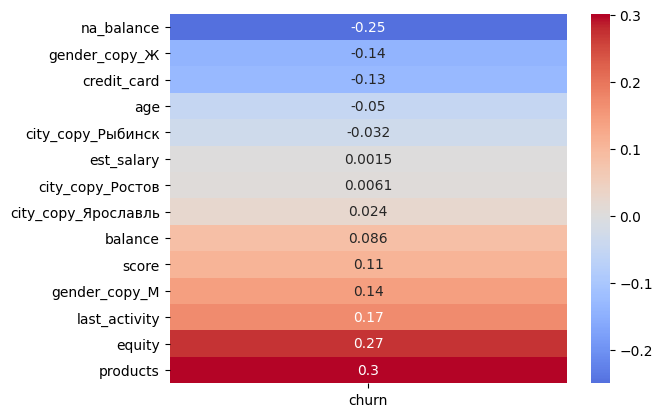

In [84]:
# корреляция Пирсона в разрезе оттока
sns.heatmap(data_corr.loc[:,['churn']].drop('churn').sort_values('churn'), cmap='coolwarm', center=0, annot = True)
plt.show()

**Далее рассчитаем корреляцию посредством библиотеки phik и сравним результаты.**

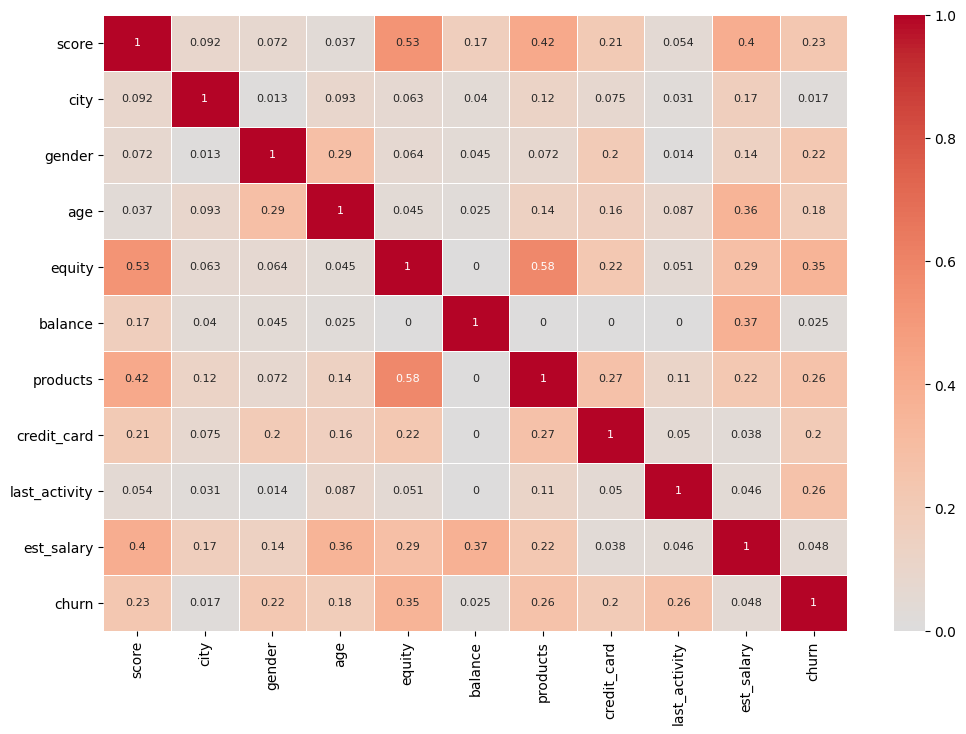

In [85]:
# расчёт корреляции через библиотеку phik
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:, 1:12].phik_matrix(interval_cols=['balance', 'est_salary', 'age', 'score']), cmap='coolwarm', center=0,\
            annot = True, annot_kws = {'size': 8}, linewidths=.5)
plt.show()

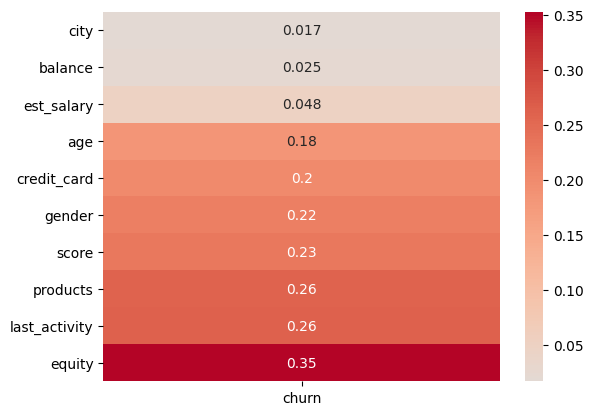

In [86]:
# расчёт корреляции через библиотеку phik в разрезе оттока
sns.heatmap(data.iloc[:, 1:12].phik_matrix(interval_cols=['balance', 'est_salary', 'age', 'score']).loc[:,['churn']].\
            drop('churn').sort_values('churn'), cmap='coolwarm', center=0, annot = True)
plt.show()

**Корреляция phik выявила заметную зависимость (0,5 - 0,7) между следующими показателями:**

- **между кредитным скорингом и баллом собственности 0,53 (кор.Пирсона для аналогичных значений 0,064).**

**Корреляция phik выявила умеренную зависимость (0,3 - 0,5) между следующими показателями:**

- **между кредитной картой и продуктами 0,46 (кор.Пирсона для аналогичных значений -0,25),**
- **между УХОДОМ из банка и количеством продуктов 0,44 (кор.Пирсона для аналогичных значений 0,3),**
- **между продуктами и баллами собственности 0,44 (кор.Пирсона для аналогичных значений 0,43),**
- **между кредитным скорингом и зарплатой 0,4 (кор.Пирсона для аналогичных значений 0,16),**
- **между зарплатой и балансом 0,37 (кор.Пирсона для аналогичных значений 0,34),**
- **между зарплатой и возрастом 0,36 (кор.Пирсона для аналогичных значений -0,04),**
- **между УХОДОМ и баллами собственности 0,35 (кор.Пирсона для аналогичных значений -0,27),**
- **между кредитным скорингом и продуктам 0,31 (кор.Пирсона для аналогичных значений -0,0041).** 

**Корреляция phik выявила слабую зависимость (0,1 - 0,3) между следующими показателями:**

- **между возрастом и полом 0,29 (кор.Пирсона для признака взаимосвязи женщины - возраст 0,21),**
- **между УХОДОМ из банка и активностью клиента 0,26 (кор.Пирсона для аналогичных значений 0,17),**
- **между УХОДОМ из банка и кредитным скорингом 0,23 (кор.Пирсона для аналогичных значений 0,11),**
- **между УХОДОМ из банка и полом 0,22 (кор.Пирсона между уходом и полом клиентов - мужчины 0,14),**
- **между количеством продуктов и городом 0,22 (кор.Пирсона для аналогичных значений от -0,043 до 0,043 для трёх городов),**
- **между кредитной картой и баллами собственности 0,22 (кор.Пирсона для аналогичных значений -0,17),**
- **между кредитной картой и кредитным скорингом 0,21 (кор.Пирсона для аналогичных значений -0,095),**
- **между кредитной картой и полом 0,2 (кор.Пирсона между кредитной картой и клиентами-мужчинами 0,13),**
- **между УХОДОМ и кредитной картой 0,2 (кор.Пирсона для аналогичных значений -0,13),**
- **между активностью клиентов и количеством продуктов 0,19 (кор.Пирсона для аналогичных значений 0,037),**
- **между УХОДОМ из банка и возрастом 0,18 (кор.Пирсона для аналогичных значений -0,05),**
- **между балансом и кредитным скорингом 0,17 (кор.Пирсона для аналогичных значений 0,24),**
- **между зарплатой и городом 0,17 (кор.Пирсона для Ярославля 0,13),**
- **между зарплатой и продуктами 0,16 (кор.Пирсона для аналогичных значений -0,12),**
- **между кредитной картой и возратом 0,16 (кор.Пирсона для аналогичных значений -0,12),**
- **между зарплатой и полом 0,14 (кор.Пирсона для аналогичных значений от -0,082 до 0,082),**
- **между возрастом и продуктами 0,13 (кор.Пирсона для аналогичных значений 0,018),**
- **между продуктами и полом 0,12 (кор.Пирсона для аналогичных значений от -0,023 до 0,023).**

**Корреляция через библиотеку phik показала больше зависимостей между уходом клиентов из банка и другими показателями, что в целом, соответствует проведённому исследованию в 4-ом разделе "Детальное изучение данных, отражённых в каждом столбце таблицы, в совокупности, и в разрезе оттока". Поэтому предлагается учитывать взаимосвязи через корреляцию phik.**

**Дополним потрет клиента.**

In [87]:
# добавление в портрет клиента данных о корреляции
portret_2['Корреляция phik'] = np.NaN

portret_2.iloc[0, 4] = 'слабая зависимость' #score
portret_2.iloc[1, 4] = 'нет зависимости' #city
portret_2.iloc[2, 4] = 'слабая зависимость (с М)' #gender
portret_2.iloc[3, 4] = 'слабая зависимость' #age
portret_2.iloc[4, 4] = 'умеренная зависимость' #equity
portret_2.iloc[5, 4] = 'нет зависимости' #balance
portret_2.iloc[6, 4] = 'умеренная зависимость' #products
portret_2.iloc[7, 4] = 'слабая зависимость' #credit_card
portret_2.iloc[8, 4] = 'слабая зависимость' #last_activity
portret_2.iloc[9, 4] = 'нет зависимости' #est_salary

In [88]:
portret_2

,Показатель,Анализ графиков,Интервалы для оттока,Среднее значение портрета,Корреляция phik
0,score,есть зависимость,интервал оттока от 820 до 940 баллов,медиана 863 балла,слабая зависимость
1,city,существенной зависимости не обнаружено,"доля оттока чуть выше в Ярославле, и чуть ниже в Рыбинске (разница не более 3,5%)",мода - Ярославль,нет зависимости
2,gender,есть зависимость,мужчины более склонны к уходу из банка,мода - М,слабая зависимость (с М)
3,age,есть зависимость,"более склонны к оттоку 25-36, 50-61 год (среди М 18-46 лет, среди Ж 46-68 лет)",средний возраст 41 год,слабая зависимость
4,equity,есть зависимость,интервал оттока от 3 до 9 баллов,медианный балл - 4,умеренная зависимость
5,balance,есть зависимость,"интервал оттока начинается от 1,1 млн рублей и выше",медианный баланс 782 тыс.рублей,нет зависимости
6,products,есть зависимость,интервал оттока от 2 до 5 продуктов,медианный число продуктов - 2,умеренная зависимость
7,credit_card,есть зависимость,клиенты БЕЗ кредитной карты более склонны к оттоку,NaN,слабая зависимость
8,last_activity,есть зависимость,активные клиенты более склонны к оттоку,NaN,слабая зависимость
9,est_salary,есть некоторая зависимость,интервал оттока от 100 тыс. до 250 тыс.рублей,медианная зарплата 125 тыс.рублей,нет зависимости


**Портрет клиента сформирован, выявлены зависимости и корреляции.**

### Формулирование статистических гипотез.

**В первую очередь следует определить тест, который мы будем использовать для проверки статистических гипотез.**

**Статистические гипотезы формируются относительно представленных данных, которые помогут внести ясность в исследование - в разрезе 2-ух групп: действующие клиента банка и ушедшие клиенты.**

**Проверка факторов для понимания, можно ли применять t-тест:**

1. ***Генеральные совокупности не должны зависеть друг от друга.***

**Данные, представленные в датасете, мы условно разделяем на 2 генеральные совокупности в разрезе критерия 'churn'. Первая генеральная совокупность - действующие клиенты банка, вторая генеральная совокупность - ушедшие из банка клиенты. Данные, представленные в датасете, независимы друг от друга.** 

2. ***Выборочные средние должны быть нормально распределены.***

**Согласно формулировке центральной предельной теоремы (ЦПТ) - выборочное среднее распределено нормально вокруг среднего генеральной совокупности, поскольку в выборке достаточно наблюдений (в совокупности с действующими клиентами 8180 наблюдений, в совокупности с "отточниками" 1820 наблюдений).**

3. ***Дисперсии рассматриваемых генеральных совокупностей должны быть равны.***

**Генеральные совокупности, которые мы определили для исследования, разного размера и есть сомнения, что дисперсии у совокупностей одинаковые. Поэтому для проведения t-теста укажем параметр equal_var равный False, и тест посчитает дисперсии выборок по отдельности.**

**Таким образом, нет препятствий для использования t-теста для проверки гипотезы о равенстве средних двух генеральных совокупностей.**

***Предлагаемые для проверки статистические гипотезы.***

1. **H0: доход у действующий клиентов и у "отточников" равен.**

    **H1: доход у действующий клиентов и у "отточников" отличается.**


2. **H0: баланс у действующий клиентов и у "отточников" равен.**

    **H1: баланс у действующий клиентов и у "отточников" отличается.**


3. **H0: количество используемых банковских продуктов у действующий клиентов и у "отточников" равен.**

    **H1: количество используемых банковских продуктов у действующий клиентов и у "отточников" отличается.**

**Проверка первой гипотезы (о доходах).**

In [89]:
sample_1 = data.query('churn == 0')['est_salary']
sample_2 = data.query('churn == 1')['est_salary']

alpha = 0.05 #примем уровень статистической значимости за 5%

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.8724727072323815
Не получилось отвергнуть нулевую гипотезу


**Нет оснований отвергнуть нулевую гипотезу о том, что зарплата у действующих клиентов и у отточников равны.**

**Проверка второй гипотезы (о балансе).**

In [90]:
sample_1 = data.dropna().query('churn == 0')['balance']
sample_2 = data.dropna().query('churn == 1')['balance']

alpha = 0.05 #примем уровень статистической значимости за 5%

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0439782929669117e-13
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергается. Принимаем альтернативную гипотезу - баланс у действующих клиентов и у отточников различается.**

**Проверка третьей гипотезы (использование банковских продуктов).**

In [91]:
sample_1 = data.query('churn == 0')['products']
sample_2 = data.query('churn == 1')['products']

alpha = 0.05 #примем уровень статистической значимости за 5%

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.2412383374296906e-139
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергается. Принимаем альтернативную гипотезу - количество используемых банковских продуктов у действующих клиентов и у отточников различается.**

**Выдвинутые статистические гипотезы проведены посредством t-testа. Для первой гипотезы (о равенстве доходов) не было оснований отвергнуть нулевую гипотезу и прянять альтернативную. Для двух других гипотез (о равенстве баланса и о равенстве используемых банковских продуктов) - была отвергнута нулевая гипотеза и принята альтернативная о различии сумм баланса и о различии количества используемых банковских продуктов между действующими клиентами и отточниками.**

## Подведение промежуточных итогов.

**Данные для проведения исследования представлены в виде таблицы, которая содержит 12 столбцов и 10000 строк.**

**На этапе предобработки данных были внесены следующие изменения в данные:**

1. ***Названия столбцов были приведены к единому стилевому оформлению (для удобства в работе),***

2. ***Были выявлены пропуски в количестве 2321 шт., что составляет 23% от всех данных. Пропуски присутствуют в двух столбцах - 'age' (в количестве 26 шт.) и 'balance' (в количестве 2295 шт.).***

**Пропуски в столбце 'age' были классифицированы по общепринятой шкале как MCAR (Missing Completely At Random / Отсутствует совершенно случайно), либо MAR (Missing At Random / Отсутствует случайно). Указанные пропуски в количестве 26 ед. составляют существенно менее 1% от общего объёма данных в 10 тыс.строк. Указанные пропуски были заполенены медианным значением по столбцу 'age', что не исказит результатов исследования.**

**Пропуски в столбце 'balance' насчитывают 2295 значений, что составляет 22,95% от всего объёма данных. Пропуски присутствуют в данных всех филиалов банка. Вероятнее всего, причина таких пропусков - во время загрузки/выгрузки данных произошла техническая ошибка. По общепринятой классификации пропусков пропуски в столбце 'balance' можно отнести к MNAR (Missing Not At Random / Отсутствует не случайно). Данные пропуски предлагается оставить без изменения, т.к. заполнение такого существенного количества пропусков каким-либо значением несомненно окажет влияние на исследование и, вероятно, исказит полученные результаты.**

3. ***Осуществлена проверка на поиск явных дубликатов (необнаружены).***

4. ***Осуществлена проверка на поиск неявных дубликатов.***

**Дублирующиеся значения обранужены в столбце 'user_id' в количестве 73 шт. Рассмотрев подробнее дублирующиеся значения можно сделать вывод о том, что это неполные дубликаты и в данных указаны разные клиенты, т.к. при совпадении значений в столбце 'user_id' значения в остальных столбцах при этом отличаются. Таким образом, данные были оставлены без изменений, т.к. они не оказались неявными дубликатами.**

5. ***В некоторых столбцах были произведены изменения типов данных.***

**Данные в столбце 'age' были приведены к типу данных int64 вместо float64 (возраст измеряется в целых числах).**

**Также в данных присутствуют 2 неупорядоченные категориальные переменные - 'city' и 'gender'. Для проведения дальнейшего корреляционного анализа данные значения были закодированы при помощи pandas.get_dummies().**

**Далее последовал этап детального изучения данных, отражённых в каждом столбце таблицы (кредитный скоринг, город, пол, возраст, баллы собственности, количество используемых продуктов, наличие/отсутствие кредитной карты, клиентская активность, уровень подтверждённой зарплаты) в совокупности по всем клиентам банка и в разрезе оттока. Данный этап позволил сформировать потрет клиента, склонного к уходу из банка.**

**Затем был проведён корреляционный анализ посредством метода corr(), который рассчитывает корреляцию Пирсона, а также посредством библиотеки phik. Для оценки значения корреляции использовалась шкала Чеддока. В результате корреляционного анализа показатели, посчитанные через библиотеку phik, показали больше зависимостей между уходом клиентов из банка и другими факторами, чем корреляция, рассчитаная по Пирсону. Поэтому было предложено учитывать взаимосвязи через корреляцию phik, чьи результаты, в целом, соответствует проведённому исследованию в 4-ом разделе (изучение данных каждого столбца таблицы).**

**Полный портрет клиента с учётом детального исследования всех показателей и корреляции представлен в таблице ниже:**

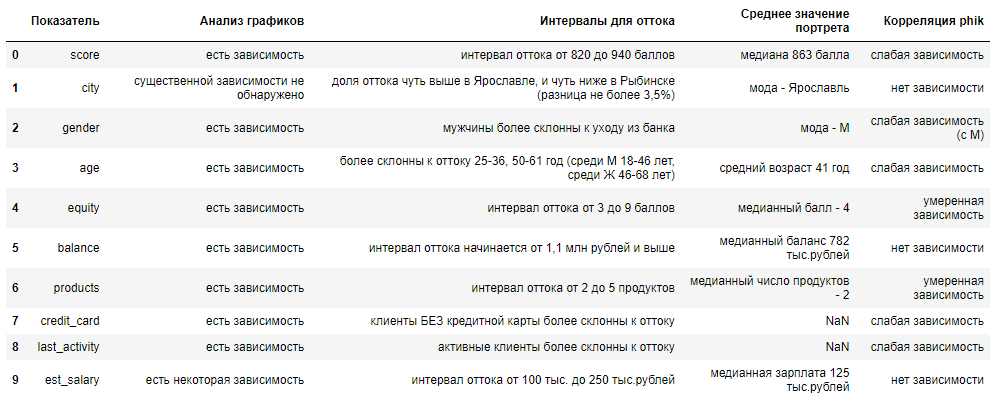

**Прослеживается зависимость между уходом клиентов из банка практически по всем показателям. Нет зависимости между городом присутствия банка и оттоком, между зарплатой и оттоком. Корреляция phik не показала зависимость оттока от баланса. Однако, в частности анализ графиков показал, что заметное превышение плотности оттока над действующими клиентами начинается с суммы баланса ~ 1.1 млн.рублей. По клиентам, которых можно отнести к сегменту ВИП (с балансом более 5 млн.рублей на счетах) также по графикам наблюдается превышение плотности оттока над действующими клиентами. Что, в целом, соответствует портрету клиента. Т.к. при рассмотрении баллов кредитного скоринга и баллов наличия собственности среди клиентов-отточников были лучшие показатели по сравнению с действующими клиентами. Таким образом, можно сделать вывод, что из банка уходят платёжеспособные клиенты с хорошим кредитным рейтингом и обеспечением.**

**Самая сильная корреляция, связанная с уходом клиента из банка, посчитана для показателя "использование банковских продуктов". Также клиенты без кредитной карты и активные клиенты более склонны к оттоку.**

**По половому признаку к уходу из банка более склонны мужчины, чем женщины. По половозрастному признаку среди мужчин к оттоку склонны люди в возрасте от 18 до 46 лет, среди женщин 46-68 лет.**

**Далее в исследовании были выдвинуты 3 гипотезы, которые были статистически проверены посредством t-testа. Для первой гипотезы (нулевая - о равенстве доходов действующих и отточных клиентов) не было оснований отвергнуть нулевую гипотезу и прянять альтернативную. Для двух других гипотез (нулевые - о равенстве баланса и о равенстве используемых банковских продуктов между действующими клиентами и отточными) - были отвергнуты нулевые гипотезы и приняты альтернативные гипотезы о различии сумм баланса и о различии количества используемых банковских продуктов между действующими клиентами и отточниками.**

**Проведённое исследование позволит провести сегментацию клиентов по выявленным критериям риска ухода клиента из банка, а также дать рекомендации для отдела маркетинга.**

## Сегментация текущих клиентов банка.

### Формирование неузких сегментов (от 500 клиентов на сегмент) по выявленным критериям риска ухода клиента из банка.

**Поскольку в ходе исследования был сделан вывод о том, что из банка уходят платёжеспособные клиенты с хорошим кредитным рейтингом, высоким обеспечением и большими остатками на счётах (в т.ч. ВИП-клиенты с остатками свыше 5 млн.рублей), предлагается посмотреть в первую очередь отток именно среди таких клиентов. Т.к. банк заинтересован в клиентах с такими характеристиками надёжности, платёжеспособности и остатками денежных средств. Анализ графиков показал, что заметное превышение плотности оттока над действующими клиентами начинается с суммы баланса ~ 1.1 млн.рублей, поэтому сегмент сформируют клиенты с балансом выше 1,1 млн.рублей.**

**Также напомним, что процент оттока клиентов банка составляет 18,2%. Процент оттока в сегменте должен превышать этот показатель. Хорошим оттоком в сегменте будем считать 50-60%.**

In [92]:
# предлагаемый к рассмотрению сегмент
s1 = data.query('credit_card == 0 & city == "Ярославль" & gender == "М" & products >=2 & est_salary > 60000')

In [93]:
s1_cur = s1.query('churn == 0')['user_id'].count()
print('Количество действующих клиентов с балансом более 1,1 млн.руб.: %s' %(s1_cur)) 
print()
s1_churn = s1.query('churn == 1')['user_id'].count()
print('Количество клиентов-отточников сегмента N 1: %s' %(s1_churn)) 
print()
print('Размер первого сегмента, количество клиентов: %s' %(s1_cur + s1_churn))
print()
print('Процент оттока в сегмента %s' %(s1_churn / (s1_cur + s1_churn) * 100))

Количество действующих клиентов с балансом более 1,1 млн.руб.: 276

Количество клиентов-отточников сегмента N 1: 234

Размер первого сегмента, количество клиентов: 510

Процент оттока в сегмента 45.88235294117647


**Первый сегмент включает в себя мужчин из Ярославля без кредитной карты, с количеством продуктов 2 и более, зарплатой выше 60 т.р. Размер первого сегмента 510 человек, из которого действующие клиенты = 234 человека. Отток в сегменте 45,8%.**

**Далее предлагается к рассмотрению второй сегмент: клиенты с балансом более 1,1 млн.рублей, количеством используемых продуктов более 2, клиенты являются активными.**

In [94]:
# предлагаемый к рассмотрению сегмент
s2 = data.query('balance > 1100000 & products >=2 & last_activity == 1')

In [95]:
s2_cur = s2.query('churn == 0')['user_id'].count()
print('Количество действующих клиентов сегмента N 2: %s' %(s2_cur)) 
print()
s2_churn = s2.query('churn == 1')['user_id'].count()
print('Количество клиентов-отточников сегмента N 2: %s' %(s2_churn)) 
print()
print('Размер второго сегмента, количество клиентов: %s' %(s2_cur + s2_churn))
print()
print('Процент оттока в сегменте %s' %(s2_churn / (s2_cur + s2_churn) * 100))

Количество действующих клиентов сегмента N 2: 323

Количество клиентов-отточников сегмента N 2: 441

Размер второго сегмента, количество клиентов: 764

Процент оттока в сегменте 57.72251308900523


**Второй сегмент представлен активными клиентами с балансом более 1,1 млн.рублей, использующие 2 и более банковских продукта. Размер второго сегмента составляет 764 человека, из которых действующих клиентов - 323 человека. Отток в сегменте 57,7%.**

**Далее предлагается к рассмотрению третий сегмент. Клиенты-мужчины в возрасте до 41 года с кредитным скорингом 860 и баллами собственности более 3-х.**

In [96]:
# предлагаемый к рассмотрению сегмент
s3 = data.query('gender=="М" & equity >= 3 & score >= 860 & age <= 41')

In [97]:
s3_cur = s3.query('churn == 0')['user_id'].count()
print('Количество действующих клиентов сегмента N 3: %s' %(s3_cur)) 
print()
s3_churn = s3.query('churn == 1')['user_id'].count()
print('Количество клиентов-отточников сегмента N 3: %s' %(s3_churn)) 
print()
print('Размер второго сегмента, количество клиентов: %s' %(s3_cur + s3_churn))
print()
print('Процент оттока в сегменте %s' %(s3_churn / (s3_cur + s3_churn) * 100))

Количество действующих клиентов сегмента N 3: 352

Количество клиентов-отточников сегмента N 3: 397

Размер второго сегмента, количество клиентов: 749

Процент оттока в сегменте 53.00400534045394


**В третьем сегменте не представлена зависимость от баланса. Сегмент сформирован по половозрастному признаку и по признаку платёжеспособности/надёжности. Размер сегмента составил 749 клиентов, из которых действующих клиентов 352 человека. Отток сегмента составил 53%.**

**Таким образом, сформированы 3 сегмента клиентов, находящихся в зоне риска ухода из банка. Минимальное количество действующих клиентов в данных сегментах составляет ~323~ 276 человек, максимальное ~954~ 352 человека. Минимальный процент оттока = ~41%~ 45.8%, максимальный 57,7%.**

### Приоритезация сегментов (вследствие отсутствия автоматизированных систем рассылок).

In [98]:
# примерный процент действующих клиентов, приходящихся на предложенные 3 сегмента
(s1_cur + s2_cur + s3_cur) / data.query('churn == 0')['user_id'].count()

0.11625916870415648

In [99]:
# примерный охват всех трёх сегментов
s1_cur + s2_cur + s3_cur

951

**Подсчёт значений условный. Нужно учитывать, что клиенты пересекаются между сегментами.**

**В случае наличия автоматизированной системы рассылок отдел маркетинга смог бы охватить все 3 сегмента, в которых совокупное количество клиентов составляет примерно 951 человек, или около 11,6% от всех действующих клиентов.**

**Однако, из-за отсутствия автоматизированной системы следует осуществить приоритезацию сегментов.**

**Предлагаются 3 подхода к приоритезации.**

**1 приоритет.**
    
***Первым по приоритету предлагаем рассмотреть второй сегмент (активные клиенты с балансом более 1,1 млн.рублей, использующие 2 и более банковских продукта), размер второго сегмента составляет 764 человека, в т.ч. действующие - 323 человека. Отток в сегменте 57,7%.***
    
***Данный сегмент предлагается к рассмотрению в первую очередь, т.к. в ходе анализа отмечен отток из банка платёжеспособных клиентов с хорошим обеспечением. В данном сегменте находятся клиенты в том числе с остатками на счетах более 1,1 млн.рублей (по логике предполагается, что это не только карт.счета, но и депозиты, и другие активы). В данной группе клиентов находятся и ВИП-клиенты с остатками на счетах в несколько десятков млн рублей. Банк напрямую заинтересован в сохранении сотрудничества с данными клиентами.***
    
**2 приоритет.**
    
***Вторым по приоритету предлагается рассмотреть 3 сегмент (клиенты-мужчины в возрасте до 41 года с кредитным скорингом 860 и баллами собственности более 3-х). Процент оттока в этом сегменте составляет 53%, охват - 352 действующих клиента.***
    
***Данный сегмент по своим качественным характеристикам лучше оставшегося (первого) сегмента - больше и процент оттока, и охват. Кроме того, оба сегмента включают в себя только клиентов-мужчин (т.к. они более склонны к оттоку) - вероятно, будет иметь место некоторое пересечение клиентов.***
    
**3 приоритет.**
    
***Последним по приоритезации является первый сегмент (мужчины из Ярославля без кредитной карты, с количеством продуктов 2 и более, зарплатой выше 60 тыс.руб.) Размер первого сегмента 510 человек, из которого действующие клиенты = 234 человека. Отток в сегменте 45,8%.***

## Формирование рекомендаций по работе с клиентами приоритетного сегмента.

1. **Рекомендации по работе с клиентами приоритетного сегмента (в качестве которого выбран второй сегмент: активные клиенты с балансом более 1,1 млн.рублей, использующие 2 и более банковских продукта):**
    
***После согласования возможных для банка условий направить клиентам по электронной почте рассылку писем с персональными предложениями, например, такими как:***
    
- ***повышенные ставки по депозитам (вероятнее всего, у данных клиентов имеются депозитные счета), и/или увеличение ставки процента на остаток денежных средств по счёту,***
    
- ***у некоторых клиентов этого сегмента имеются иные банковские продукты (кроме текущего карт.счёта и депозита); менеджерам следует провести индивидуальную работу по каждому клиенту, и при выявлении иных продуктов согласовать персональные условия (например, при наличии страховки ОСАГО/КАСКО/недвижимость/жизнь - предоставить скидочный купон на продление страховки на предстоящий год, и т.п. по иным выявленным продуктам),***
    
- ***поскольку клиенты являются активными - возможно следует рассмотреть вопрос о проведении какой-либо промо-акции/ конкурса с призами/ скидками на банковские услуги, которые будут интересны для активных клиентов банка,***
    
- ***не забыть поздравить по электронной почте действующих клиентов выбранного сегмента с днём рождения.***
    
***Через одну-две недели после осуществления рассылки можно перейти к холодным звонкам с предложением тех же персональных предложений и получения обратной связи.***
    
    
    
2. **Рекомендации по работе с клиентами второго по приоритету сегмента (в качестве которого выбран сегмент N 3: клиенты-мужчины в возрасте до 41 года с кредитным скорингом 860 и баллами собственности более 3-х):**
    
***После согласования возможных для банка условий направить клиентам по электронной почте рассылку писем с персональными предложениями, например, такими как:***
    
- ***понижение ставки по потребительскому кредиту/ овердрафту/ кредитной карте (на вероятное наличие которых указывает высокий кредитный скоринг и баллы собственности, часть из которой, возможно, находится в залоге у банка по программам ипотеки/автокредитования),***
    
- ***при наличии кредитной карты - увеличение лимита,***
    
- ***в случае наличия у клиента ипотеки либо автокредита с залогом авто - предоставить скидку на страхование жизни и/или недвижимости и/или автомобиля, если клиент застраховался в банке (понижение ставки по кредитам с залоговым обеспечением, особенно, если речь идёт об ипотеке - не целесообразно),***
    
- ***поскольку клиентами являются мужчины - возможно следует рассмотреть вопрос о проведении какой-либо промо-акции/ конкурса с призами/ скидками на банковские услуги, которые будут интересны именно этой целевой аудитории (возможно, приурочить к национальным/государственным праздникам, например, день отца, либо обыграть тему рыбалка/охота/активные виды спорта),***
    
- ***не забыть поздравить по электронной почте действующих клиентов выбранного сегмента с днём рождения.***
    
***Через одну-две недели после осуществления рассылки можно перейти к холодным звонкам с предложением тех же персональных предложений и получения обратной связи.***
    
    
3. **Рекомендации по работе с клиентами последнего по приоритету сегмента (в качестве которого выбран сегмент N 1: мужчины из Ярославля без кредитной карты, с количеством продуктов 2 и более, зарплатой выше 60 тыс.руб.):**
    
***После согласования возможных для банка условий направить клиентам по электронной почте рассылку писем с персональными предложениями, например, такими как:***
    
- ***дополнительный повышенный кэш-бек на выбранную категорию на 3-6 месяцев,***
    
- ***повышенный процент на остаток по карт-счёту на 3-6 месяцев,***
    
- ***индивидуальная работа по вопросу использования клиентом банковских продуктов - в зависимости от наличия кредита/депозита/страховки/иных продуктов - представить скидку, либо изменение процентной ставки,***
    
- ***поскольку клиентами являются мужчины - возможно следует рассмотреть вопрос о проведении какой-либо промо-акции/ конкурса с призами/ скидками на банковские услуги, которые будут интересны именно этой целевой аудитории (возможно, приурочить к национальным/государственным праздникам, например, день отца, день города (клиенты из Ярославля), либо обыграть тему рыбалка/охота/активные виды спорта),***
    
- ***не забыть поздравить по электронной почте действующих клиентов выбранного сегмента с днём рождения.***
    
***Через одну-две недели после осуществления рассылки можно перейти к холодным звонкам с предложением тех же персональных предложений и получения обратной связи.***